# Exploratory Data Analysis on UCI dataset

Notebook Author: Anisha Pant

# Necessary Imports and Setups

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# Set a more professional style
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['axes.labelsize'] = 11
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

male_color = 'cornflowerblue'
female_color = 'salmon'

## Importing Data and Preprocesing

In [2]:
df = pd.read_csv('heart_disease_uci.csv')

df = df.drop(['id', 'dataset'], axis=1)

new_column_names = {
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'Chest Pain Type',
    'trestbps': 'Resting Blood Pressure',
    'chol': 'Cholesterol',
    'fbs': 'Fasting Blood Sugar',
    'restecg': 'Resting ECG',
    'thalch': 'Max Heart Rate',
    'exang': 'Exercise-Induced Angina',
    'oldpeak': 'ST Depression',
    'slope': 'Slope of ST',
    'ca': 'Number of Major Vessels',
    'thal': 'Thalassemia',
    'num': 'Diagnosis'
}

df = df.rename(columns=new_column_names)

df['Diagnosis'] = df['Diagnosis'].apply(lambda x: 0 if x == 0 else 1)

print("Missing values before removal:")
print(df.isnull().sum())
print(f"Original dataset shape: {df.shape}")

df = df.dropna()
print("\nDataset shape after removing missing values:")
print(df.shape)

numerical_features = []
categorical_features = []

for column in df.columns:
    if column == 'Diagnosis':
        continue
        
    if df[column].dtype == 'object' or df[column].nunique() < 10:
        categorical_features.append(column)
    else:
        numerical_features.append(column)

print("\nNumerical features:", numerical_features)
print("Categorical features:", categorical_features)


Missing values before removal:
Age                          0
Sex                          0
Chest Pain Type              0
Resting Blood Pressure      59
Cholesterol                 30
Fasting Blood Sugar         90
Resting ECG                  2
Max Heart Rate              55
Exercise-Induced Angina     55
ST Depression               62
Slope of ST                309
Number of Major Vessels    611
Thalassemia                486
Diagnosis                    0
dtype: int64
Original dataset shape: (920, 14)

Dataset shape after removing missing values:
(299, 14)

Numerical features: ['Age', 'Resting Blood Pressure', 'Cholesterol', 'Max Heart Rate', 'ST Depression']
Categorical features: ['Sex', 'Chest Pain Type', 'Fasting Blood Sugar', 'Resting ECG', 'Exercise-Induced Angina', 'Slope of ST', 'Number of Major Vessels', 'Thalassemia']


## Data Explorations

### Numerical Feature Distributions

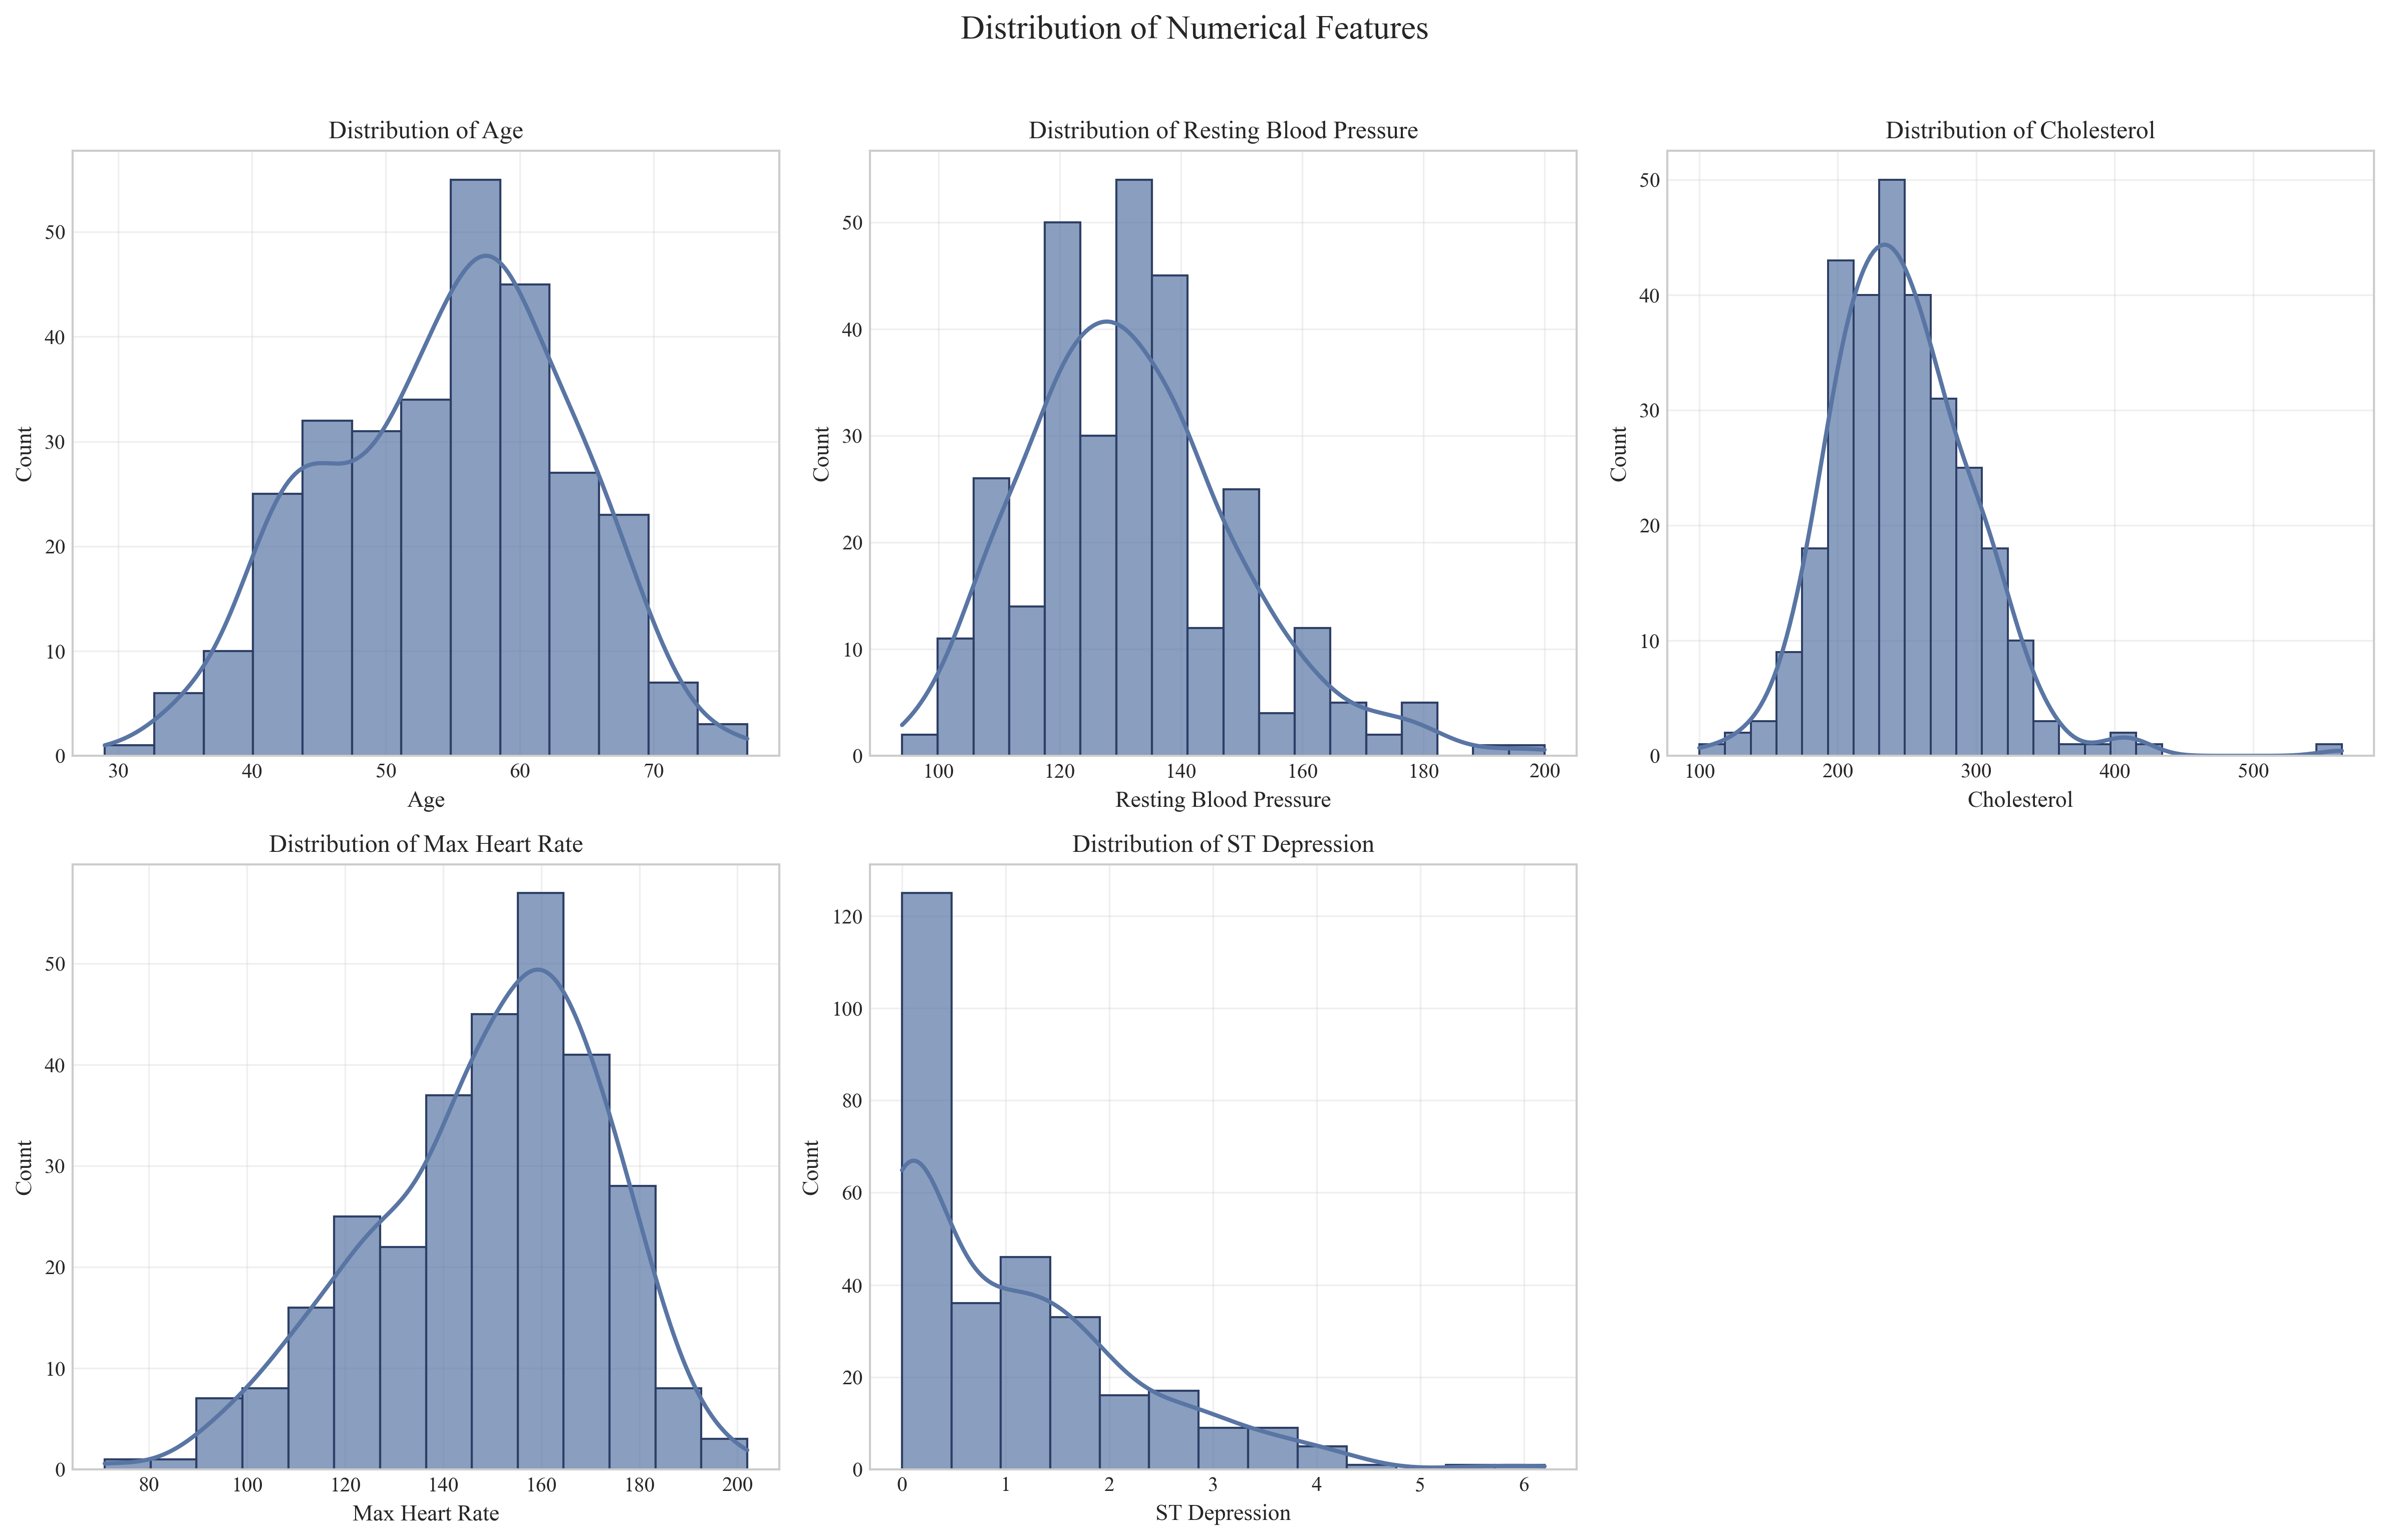

In [3]:

numerical_color = '#5975A4'
numerical_edge_color = '#2E3F66'
categorical_palette = ['#5975A4', '#8FB3A9', '#B97B56', '#D49464', '#B3C0CF', '#7D8FAF', '#B58A6C', '#A4A4A4']

plt.figure(figsize=(16, 10))
for i, feature in enumerate(numerical_features[:6]):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], kde=True, color=numerical_color, edgecolor=numerical_edge_color, alpha=0.7, line_kws={'linewidth': 2})
    plt.title(f'Distribution of {feature}')
    plt.grid(True, alpha=0.3)
plt.suptitle('Distribution of Numerical Features', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


### Categorical Feature Distributions

/var/folders/7j/4lx45fps5wsbdg7_v2jkwytm0000gn/T/ipykernel_60421/3536864090.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index.astype(str), y=value_counts.values, palette=categorical_palette[:len(value_counts)], alpha=0.8)
/var/folders/7j/4lx45fps5wsbdg7_v2jkwytm0000gn/T/ipykernel_60421/3536864090.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index.astype(str), y=value_counts.values, palette=categorical_palette[:len(value_counts)], alpha=0.8)
/var/folders/7j/4lx45fps5wsbdg7_v2jkwytm0000gn/T/ipykernel_60421/3536864090.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

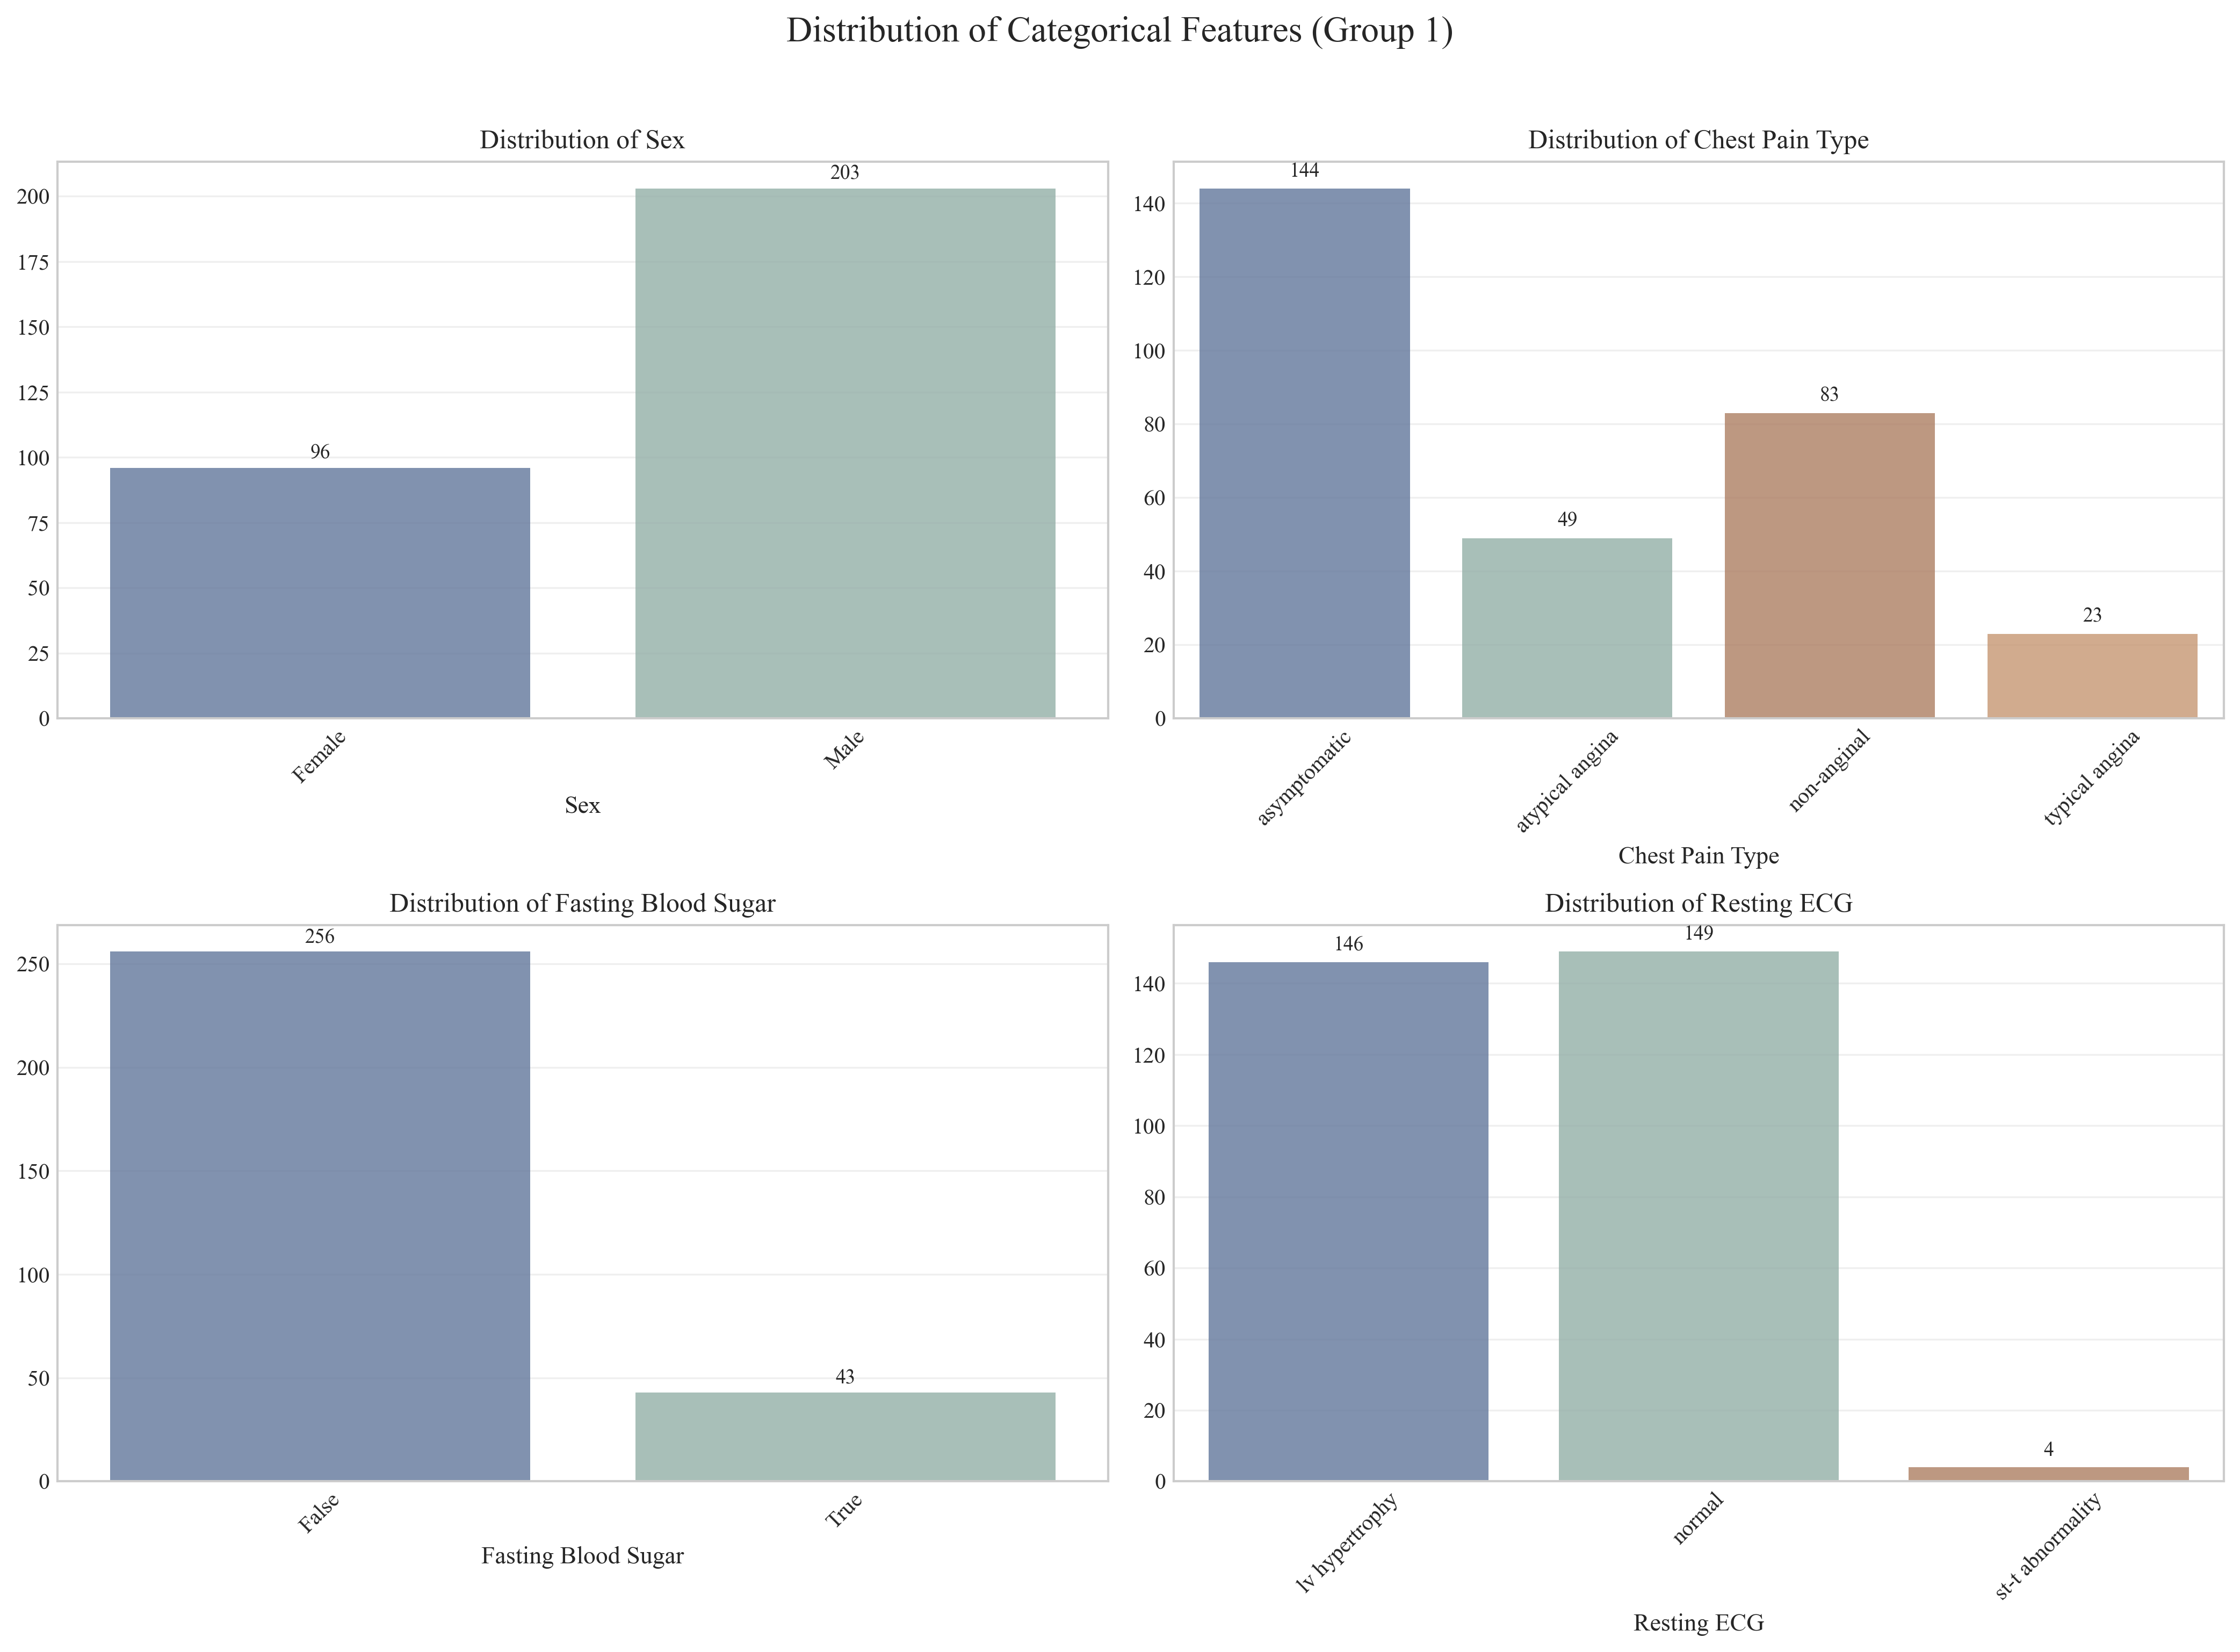

/var/folders/7j/4lx45fps5wsbdg7_v2jkwytm0000gn/T/ipykernel_60421/3536864090.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index.astype(str), y=value_counts.values, palette=categorical_palette[:len(value_counts)], alpha=0.8)
/var/folders/7j/4lx45fps5wsbdg7_v2jkwytm0000gn/T/ipykernel_60421/3536864090.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index.astype(str), y=value_counts.values, palette=categorical_palette[:len(value_counts)], alpha=0.8)
/var/folders/7j/4lx45fps5wsbdg7_v2jkwytm0000gn/T/ipykernel_60421/3536864090.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

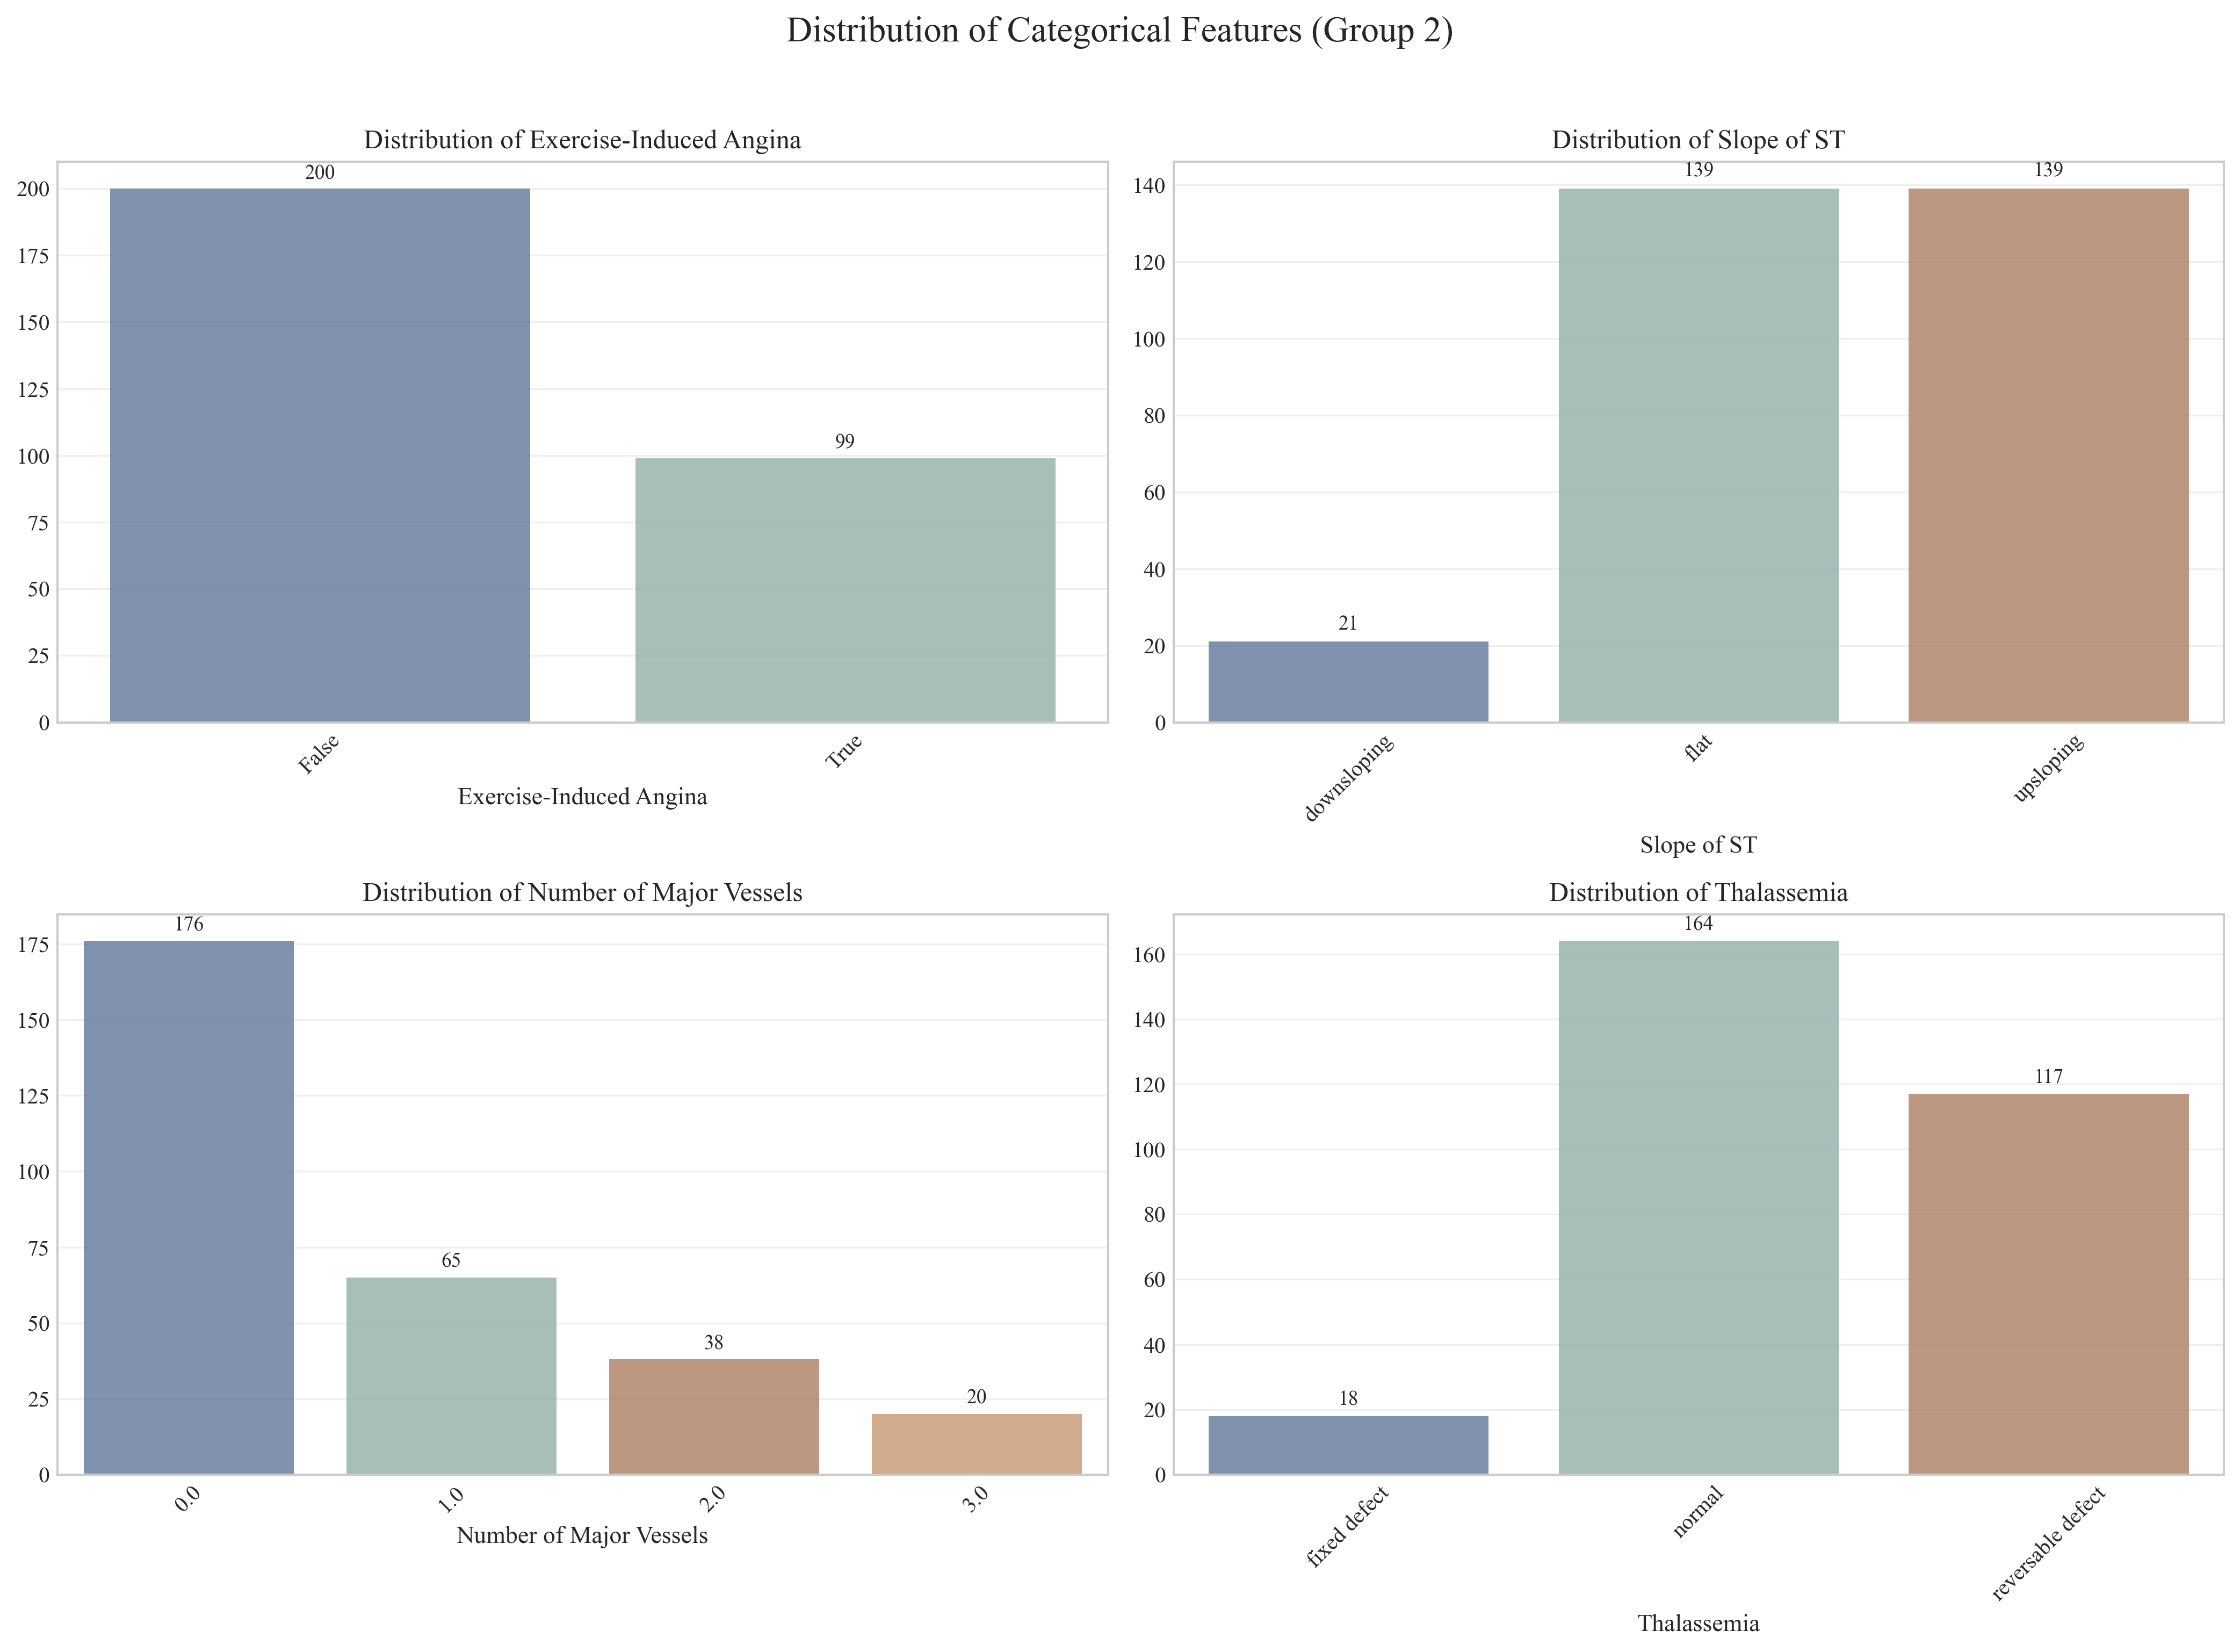

In [4]:
n_figures = (len(categorical_features) + 3) // 4
for fig_num in range(n_figures):
    plt.figure(figsize=(14, 10))
    for i, feature in enumerate(categorical_features[fig_num * 4 : (fig_num + 1) * 4]):
        plt.subplot(2, 2, i+1)
        value_counts = df[feature].value_counts().sort_index()
        ax = sns.barplot(x=value_counts.index.astype(str), y=value_counts.values, palette=categorical_palette[:len(value_counts)], alpha=0.8)
        plt.title(f'Distribution of {feature}')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3, axis='y')
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width()/2., p.get_height() + 2), ha='center', va='bottom', fontsize=9)
    plt.suptitle(f'Distribution of Categorical Features (Group {fig_num+1})', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()


### Feature Correlations

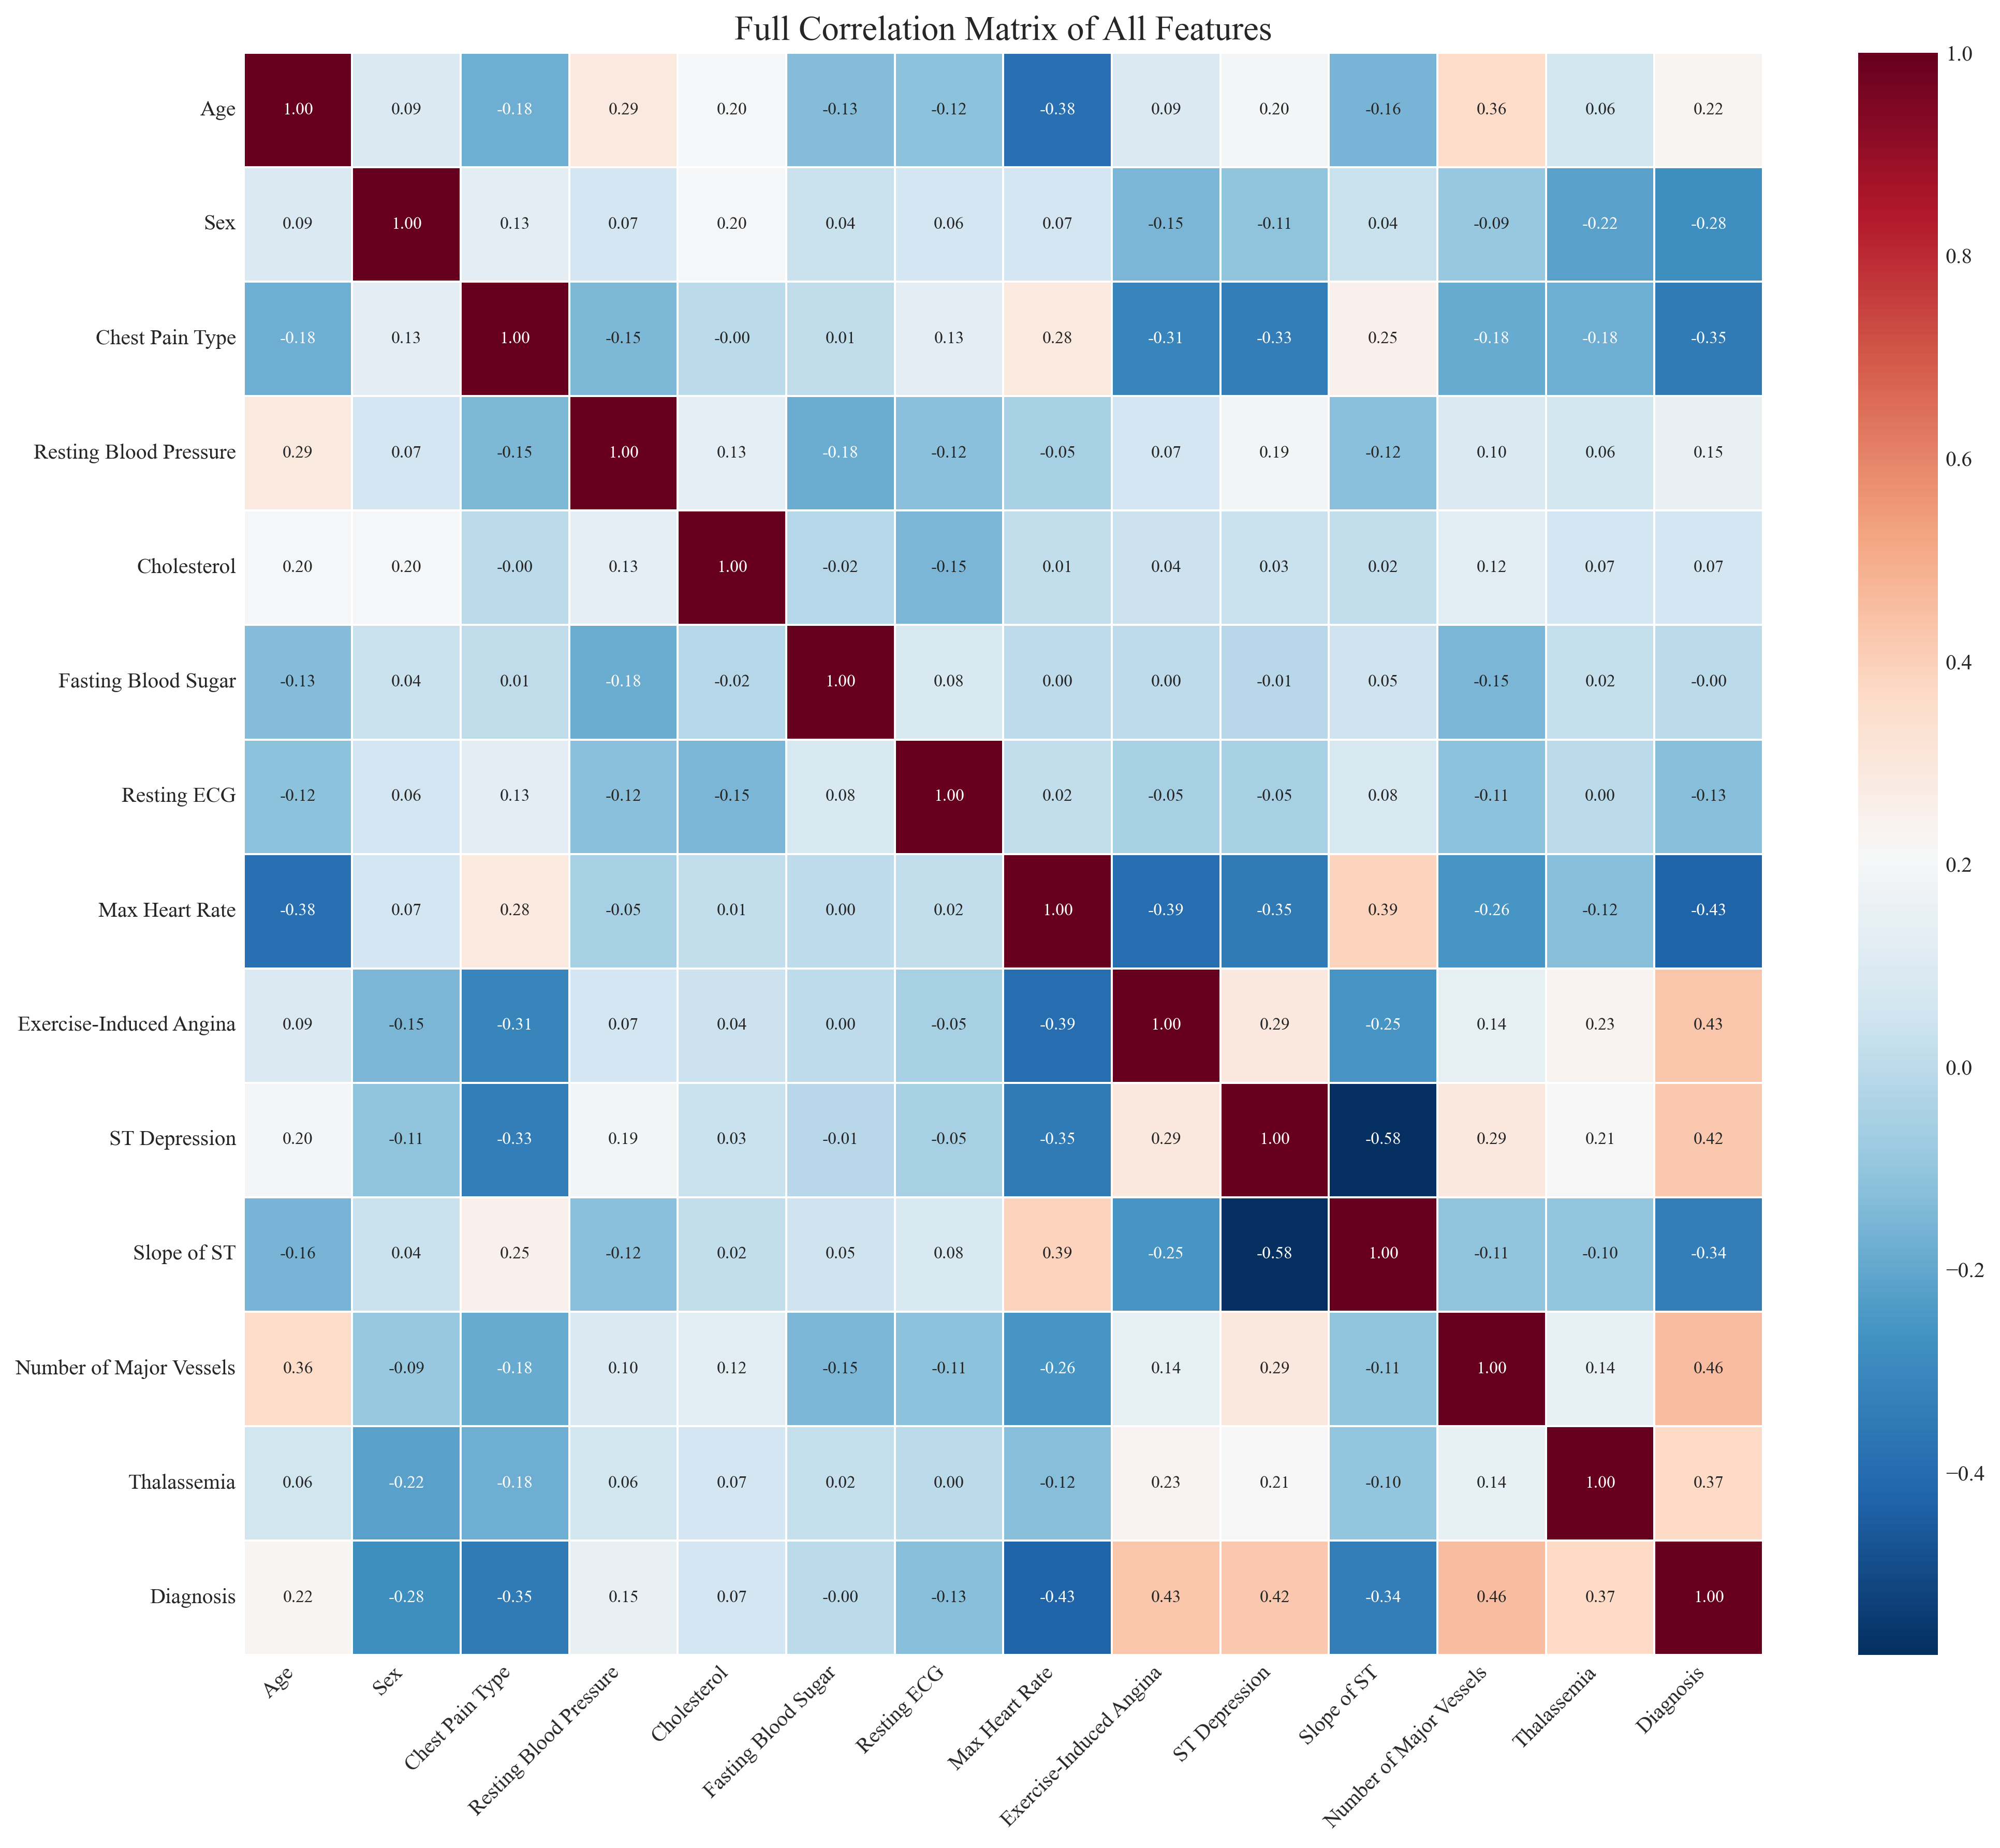

/var/folders/7j/4lx45fps5wsbdg7_v2jkwytm0000gn/T/ipykernel_60421/3995082516.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=target_corr.values, y=target_corr.index, palette=corr_palette)


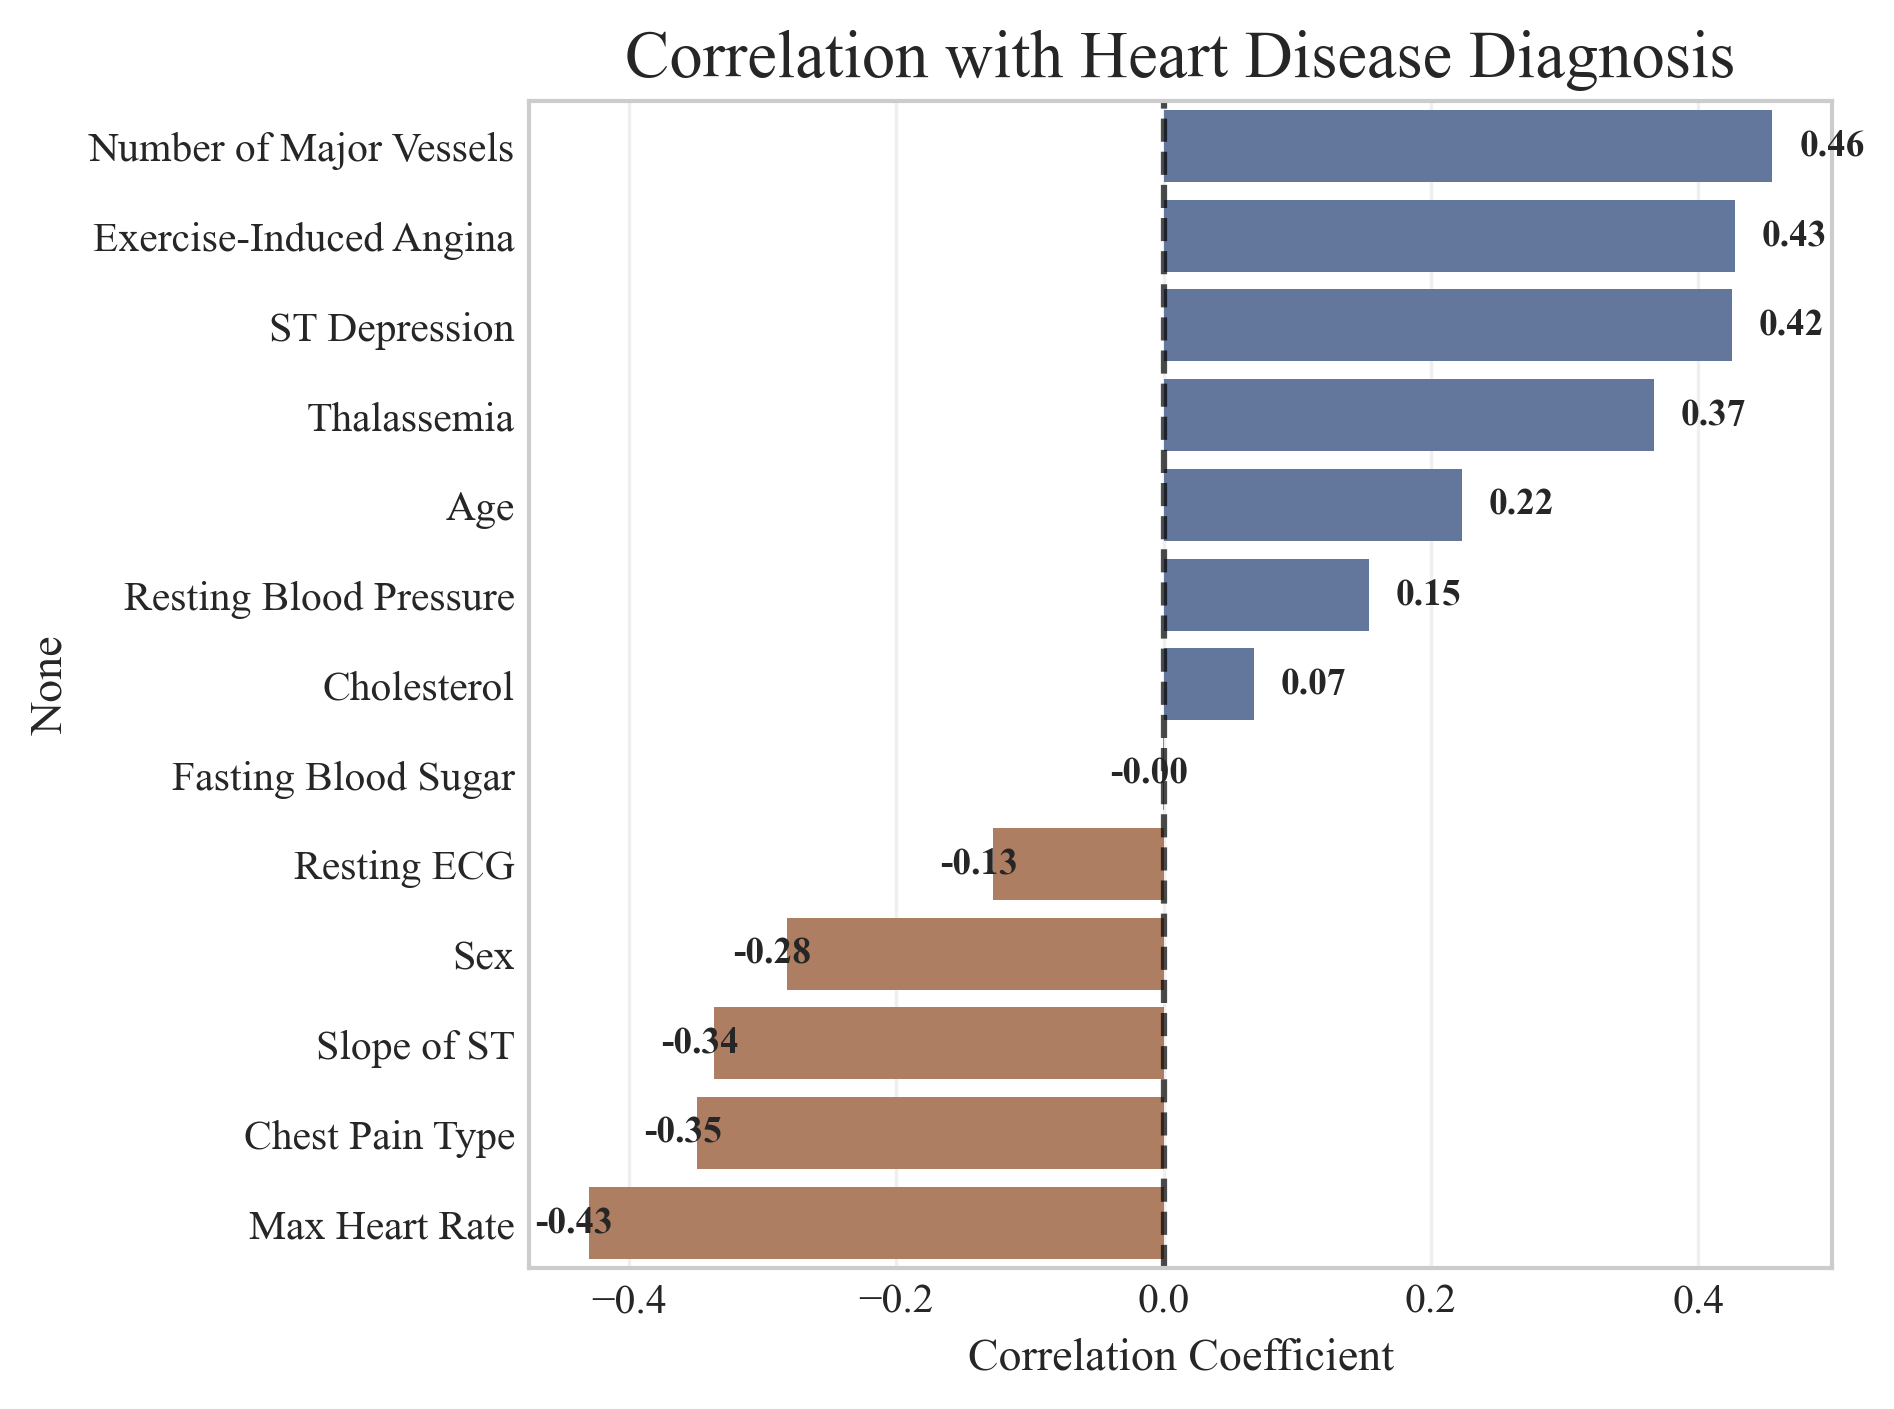

In [5]:

df_corr = df.copy()
for feature in categorical_features:
    if df_corr[feature].dtype == 'object':
        df_corr[feature] = pd.factorize(df_corr[feature])[0]

correlation_matrix = df_corr.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', fmt='.2f', linewidths=0.5, annot_kws={"size": 8})
plt.title('Full Correlation Matrix of All Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

target_corr = correlation_matrix['Diagnosis'].drop('Diagnosis').sort_values(ascending=False)
corr_palette = ['#5975A4' if v >= 0 else '#B97B56' for v in target_corr.values]

ax = sns.barplot(x=target_corr.values, y=target_corr.index, palette=corr_palette)
plt.title('Correlation with Heart Disease Diagnosis', fontsize=16)
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='black', linestyle='--', alpha=0.7)
plt.grid(True, alpha=0.3, axis='x')

for i, v in enumerate(target_corr.values):
    ax.text(v + 0.02 if v >= 0 else v - 0.04, i, f'{v:.2f}', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()


### Target Distribution

/var/folders/7j/4lx45fps5wsbdg7_v2jkwytm0000gn/T/ipykernel_60421/3689079336.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=diagnosis_counts.index.astype(str), y=diagnosis_counts.values, palette=['#5975A4', '#B97B56'])


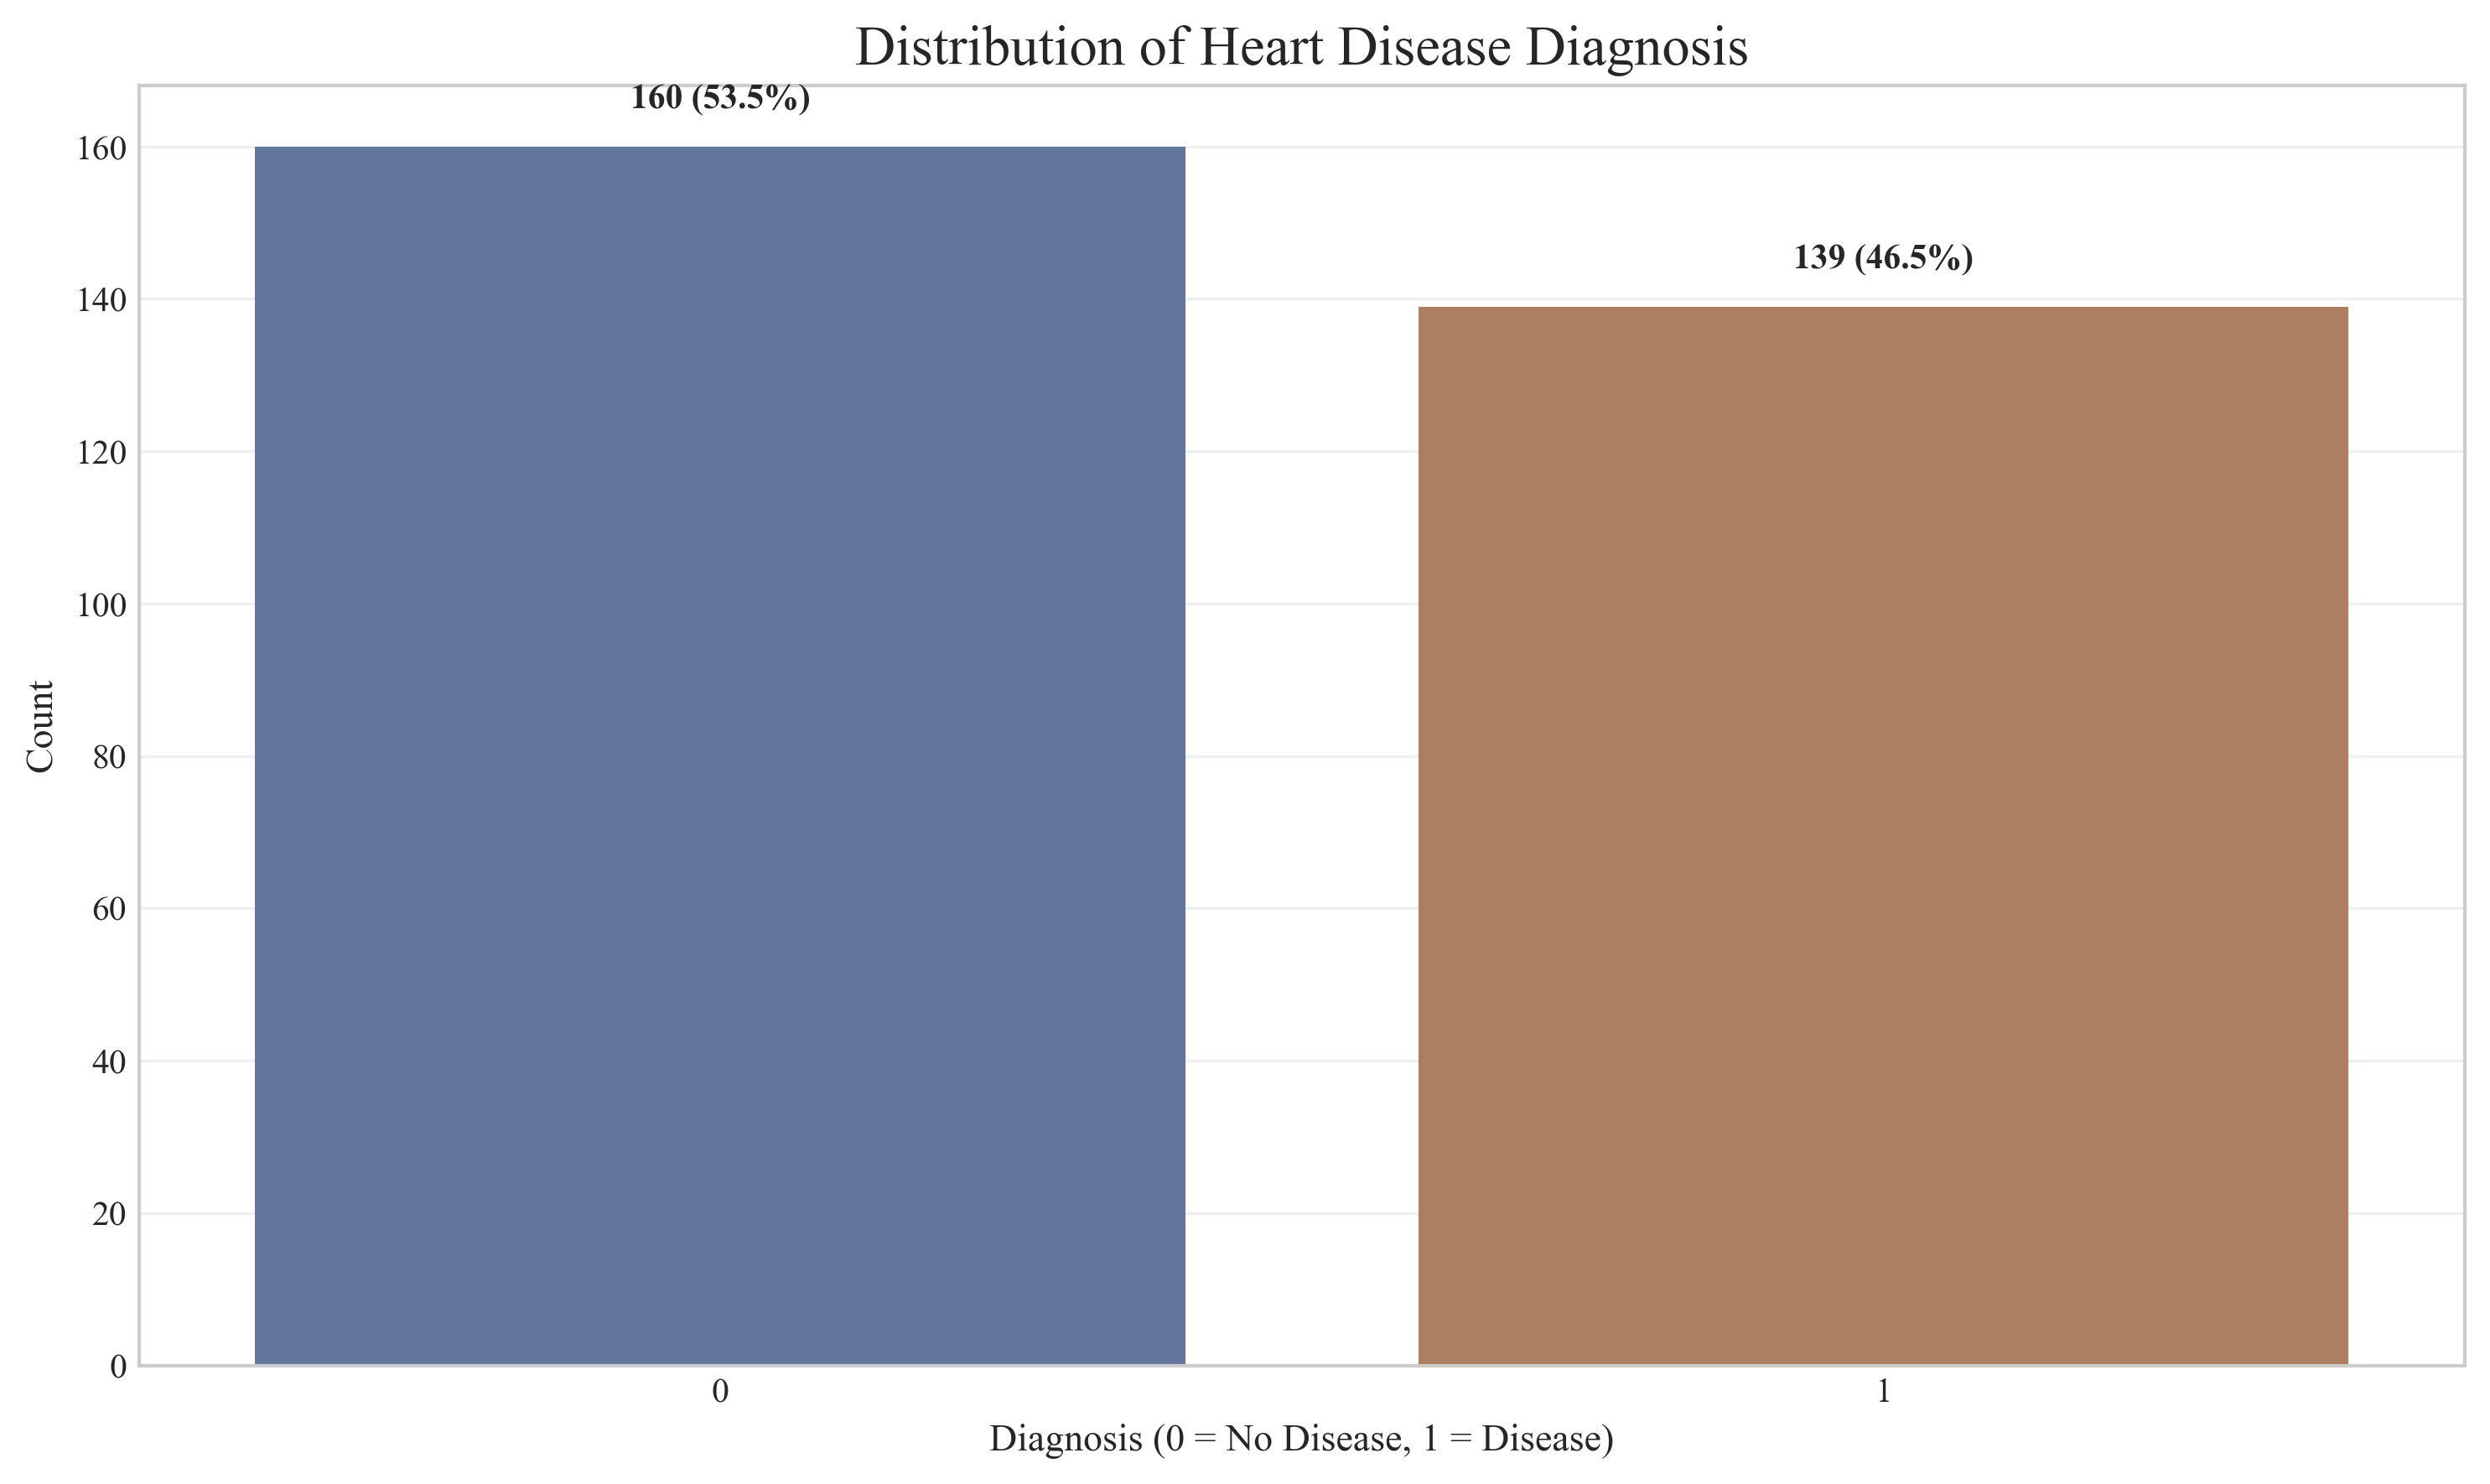

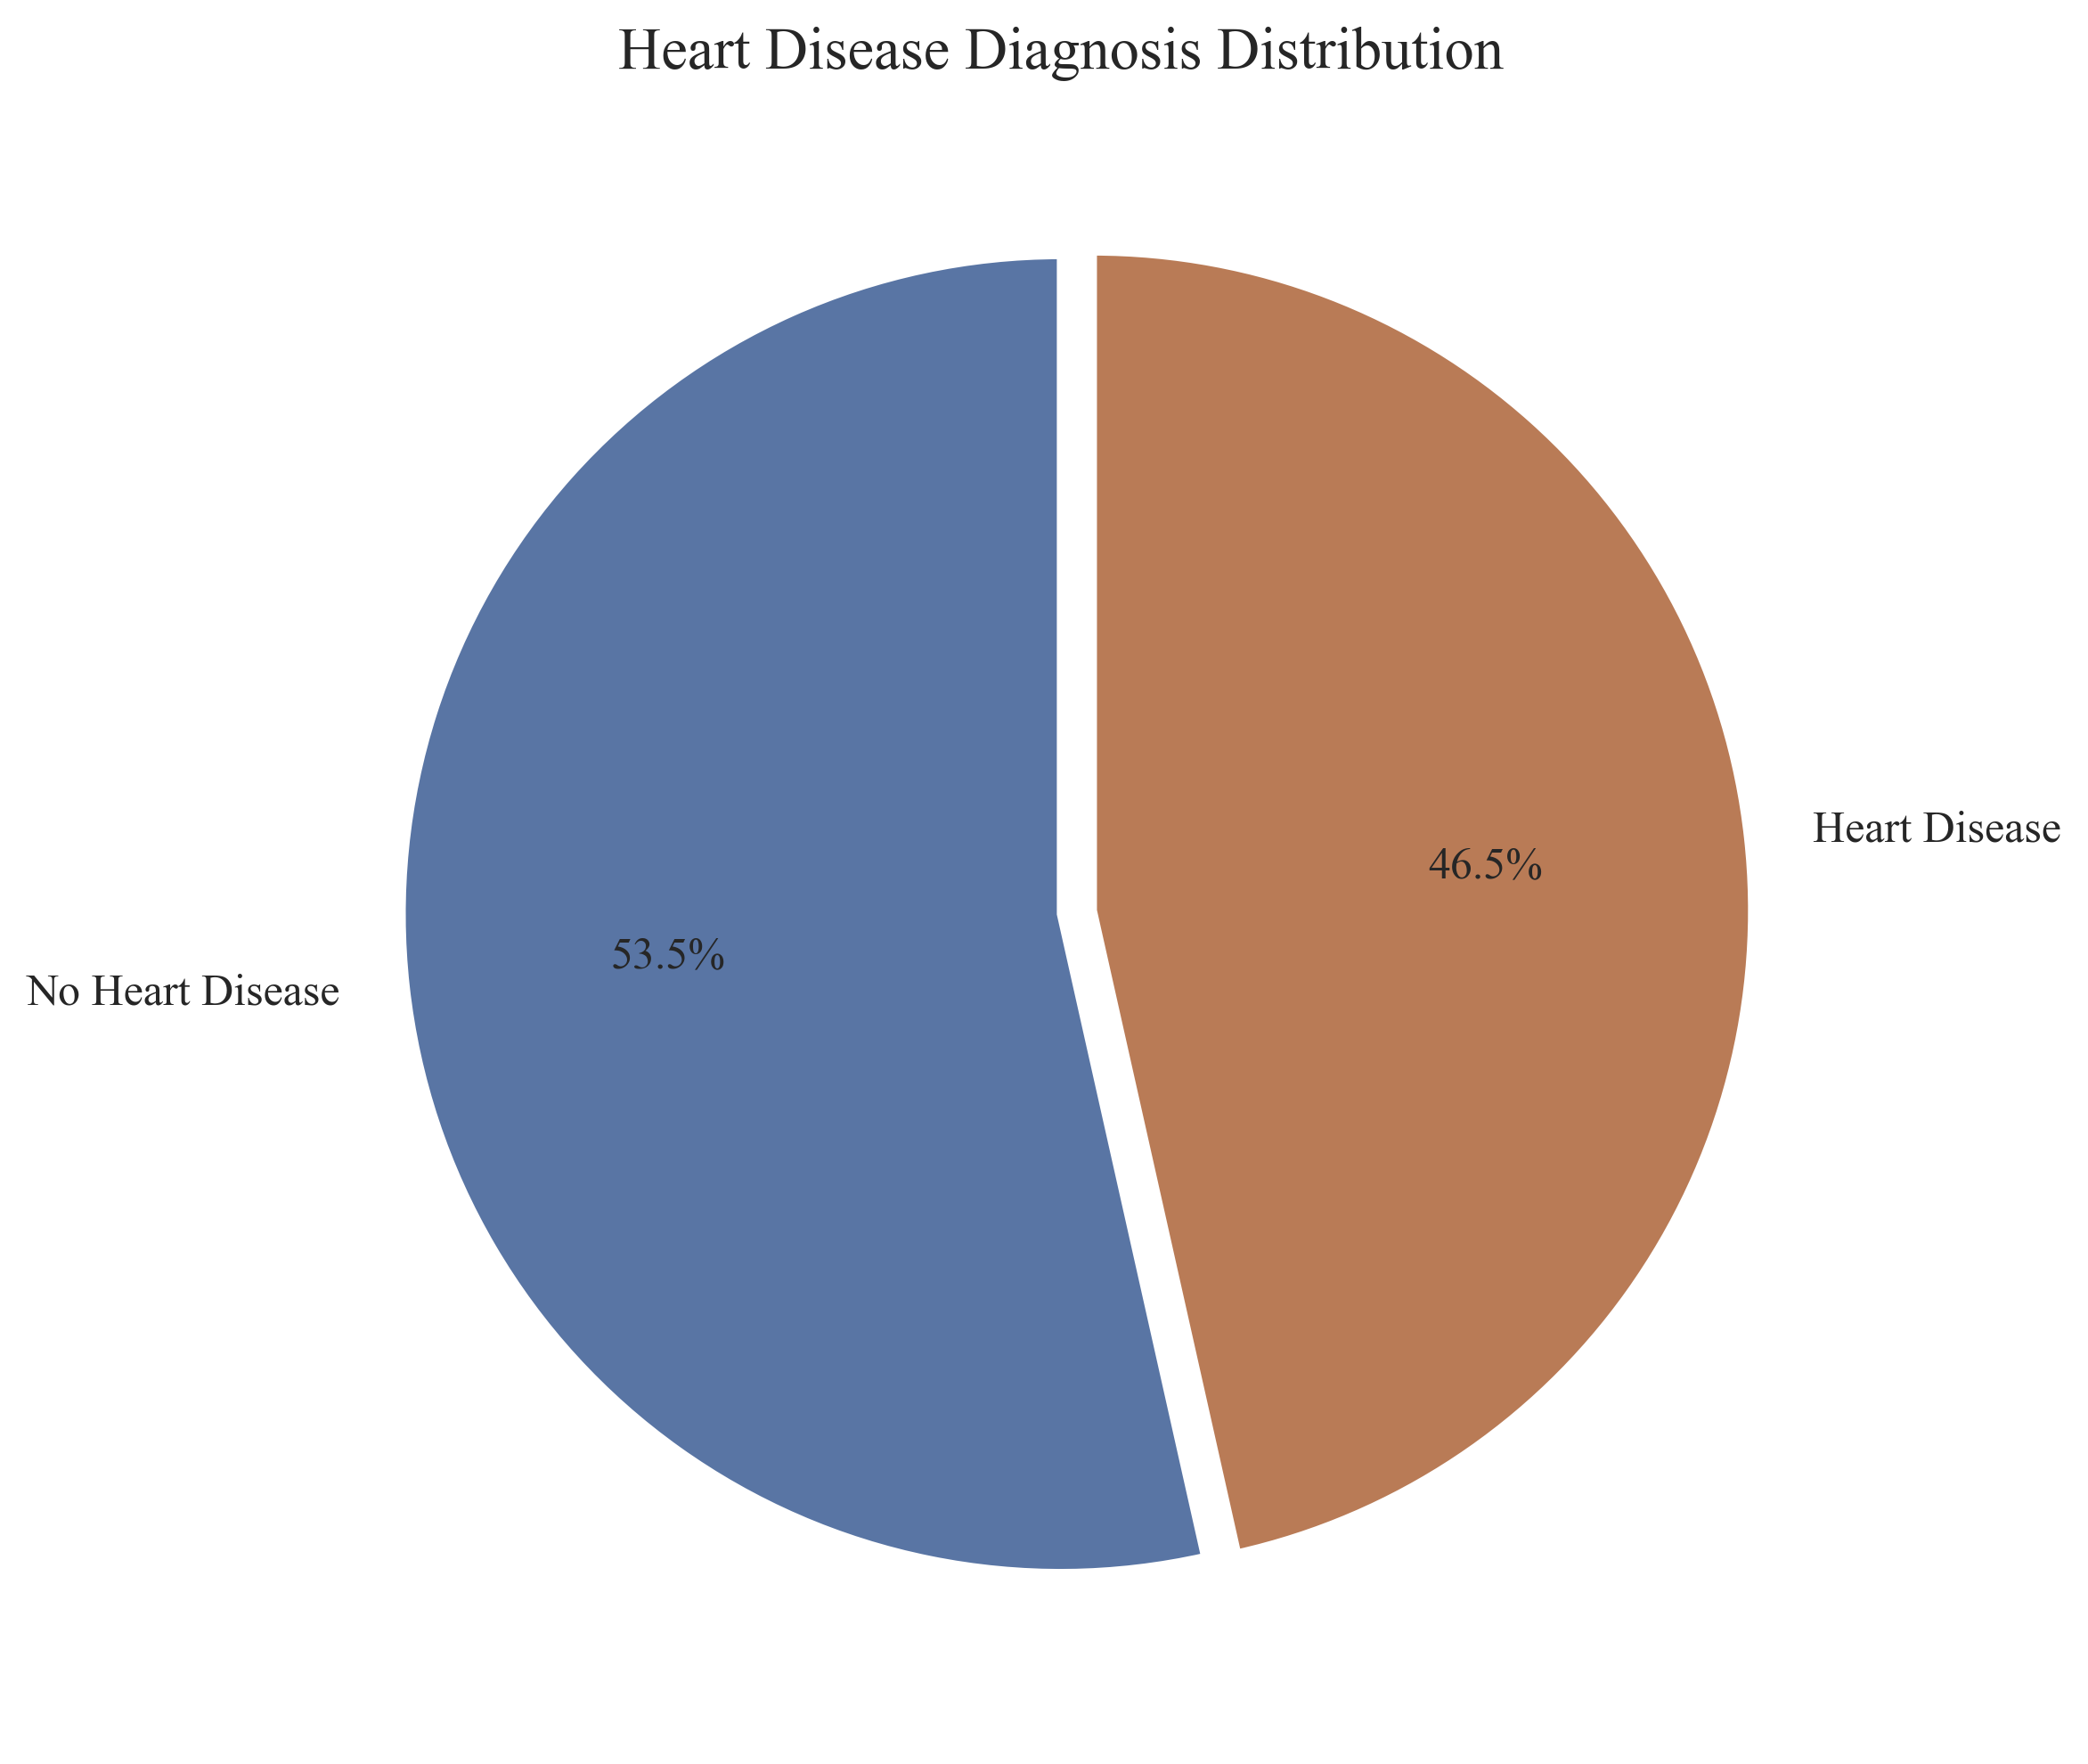

In [6]:
plt.figure(figsize=(10, 6))
diagnosis_counts = df['Diagnosis'].value_counts().sort_index()
ax = sns.barplot(x=diagnosis_counts.index.astype(str), y=diagnosis_counts.values, palette=['#5975A4', '#B97B56'])
plt.title('Distribution of Heart Disease Diagnosis', fontsize=16)
plt.xlabel('Diagnosis (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3, axis='y')
for i, count in enumerate(diagnosis_counts):
    percentage = 100 * count / len(df)
    ax.text(i, count + 5, f'{count} ({percentage:.1f}%)', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
diagnosis_counts.plot.pie(autopct='%1.1f%%', labels=['No Heart Disease', 'Heart Disease'], colors=['#5975A4', '#B97B56'], startangle=90, explode=[0, 0.05], textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'white', 'linewidth': 2})
plt.title('Heart Disease Diagnosis Distribution', fontsize=16)
plt.ylabel('')
plt.show()


## Bias Exploration - by Age

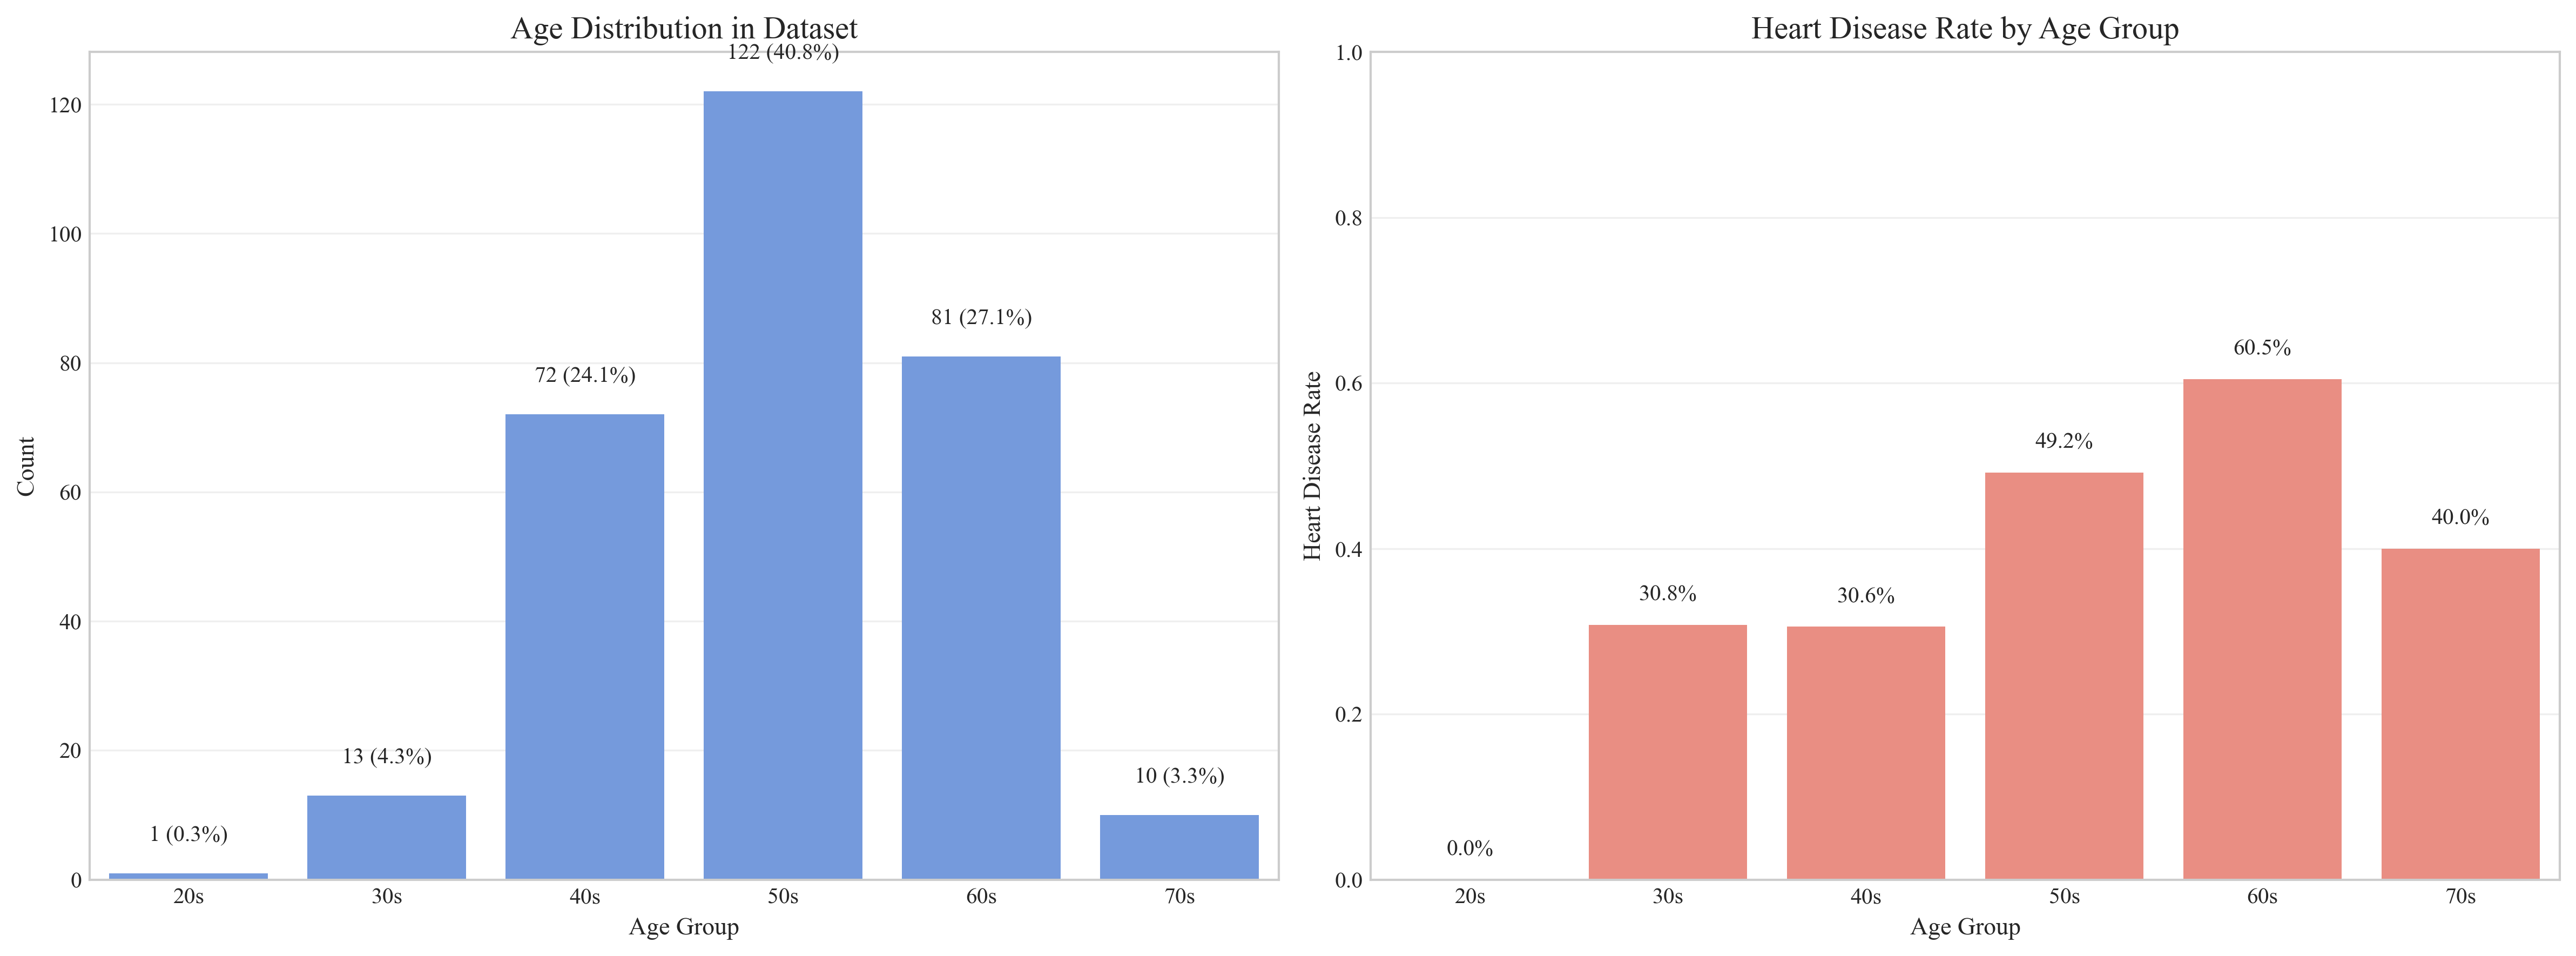

/var/folders/7j/4lx45fps5wsbdg7_v2jkwytm0000gn/T/ipykernel_60421/3667161187.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Age Group', y=feature, data=df, ax=axes[i], palette='coolwarm')
/var/folders/7j/4lx45fps5wsbdg7_v2jkwytm0000gn/T/ipykernel_60421/3667161187.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Age Group', y=feature, data=df, ax=axes[i], palette='coolwarm')
/var/folders/7j/4lx45fps5wsbdg7_v2jkwytm0000gn/T/ipykernel_60421/3667161187.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Age Group', y=

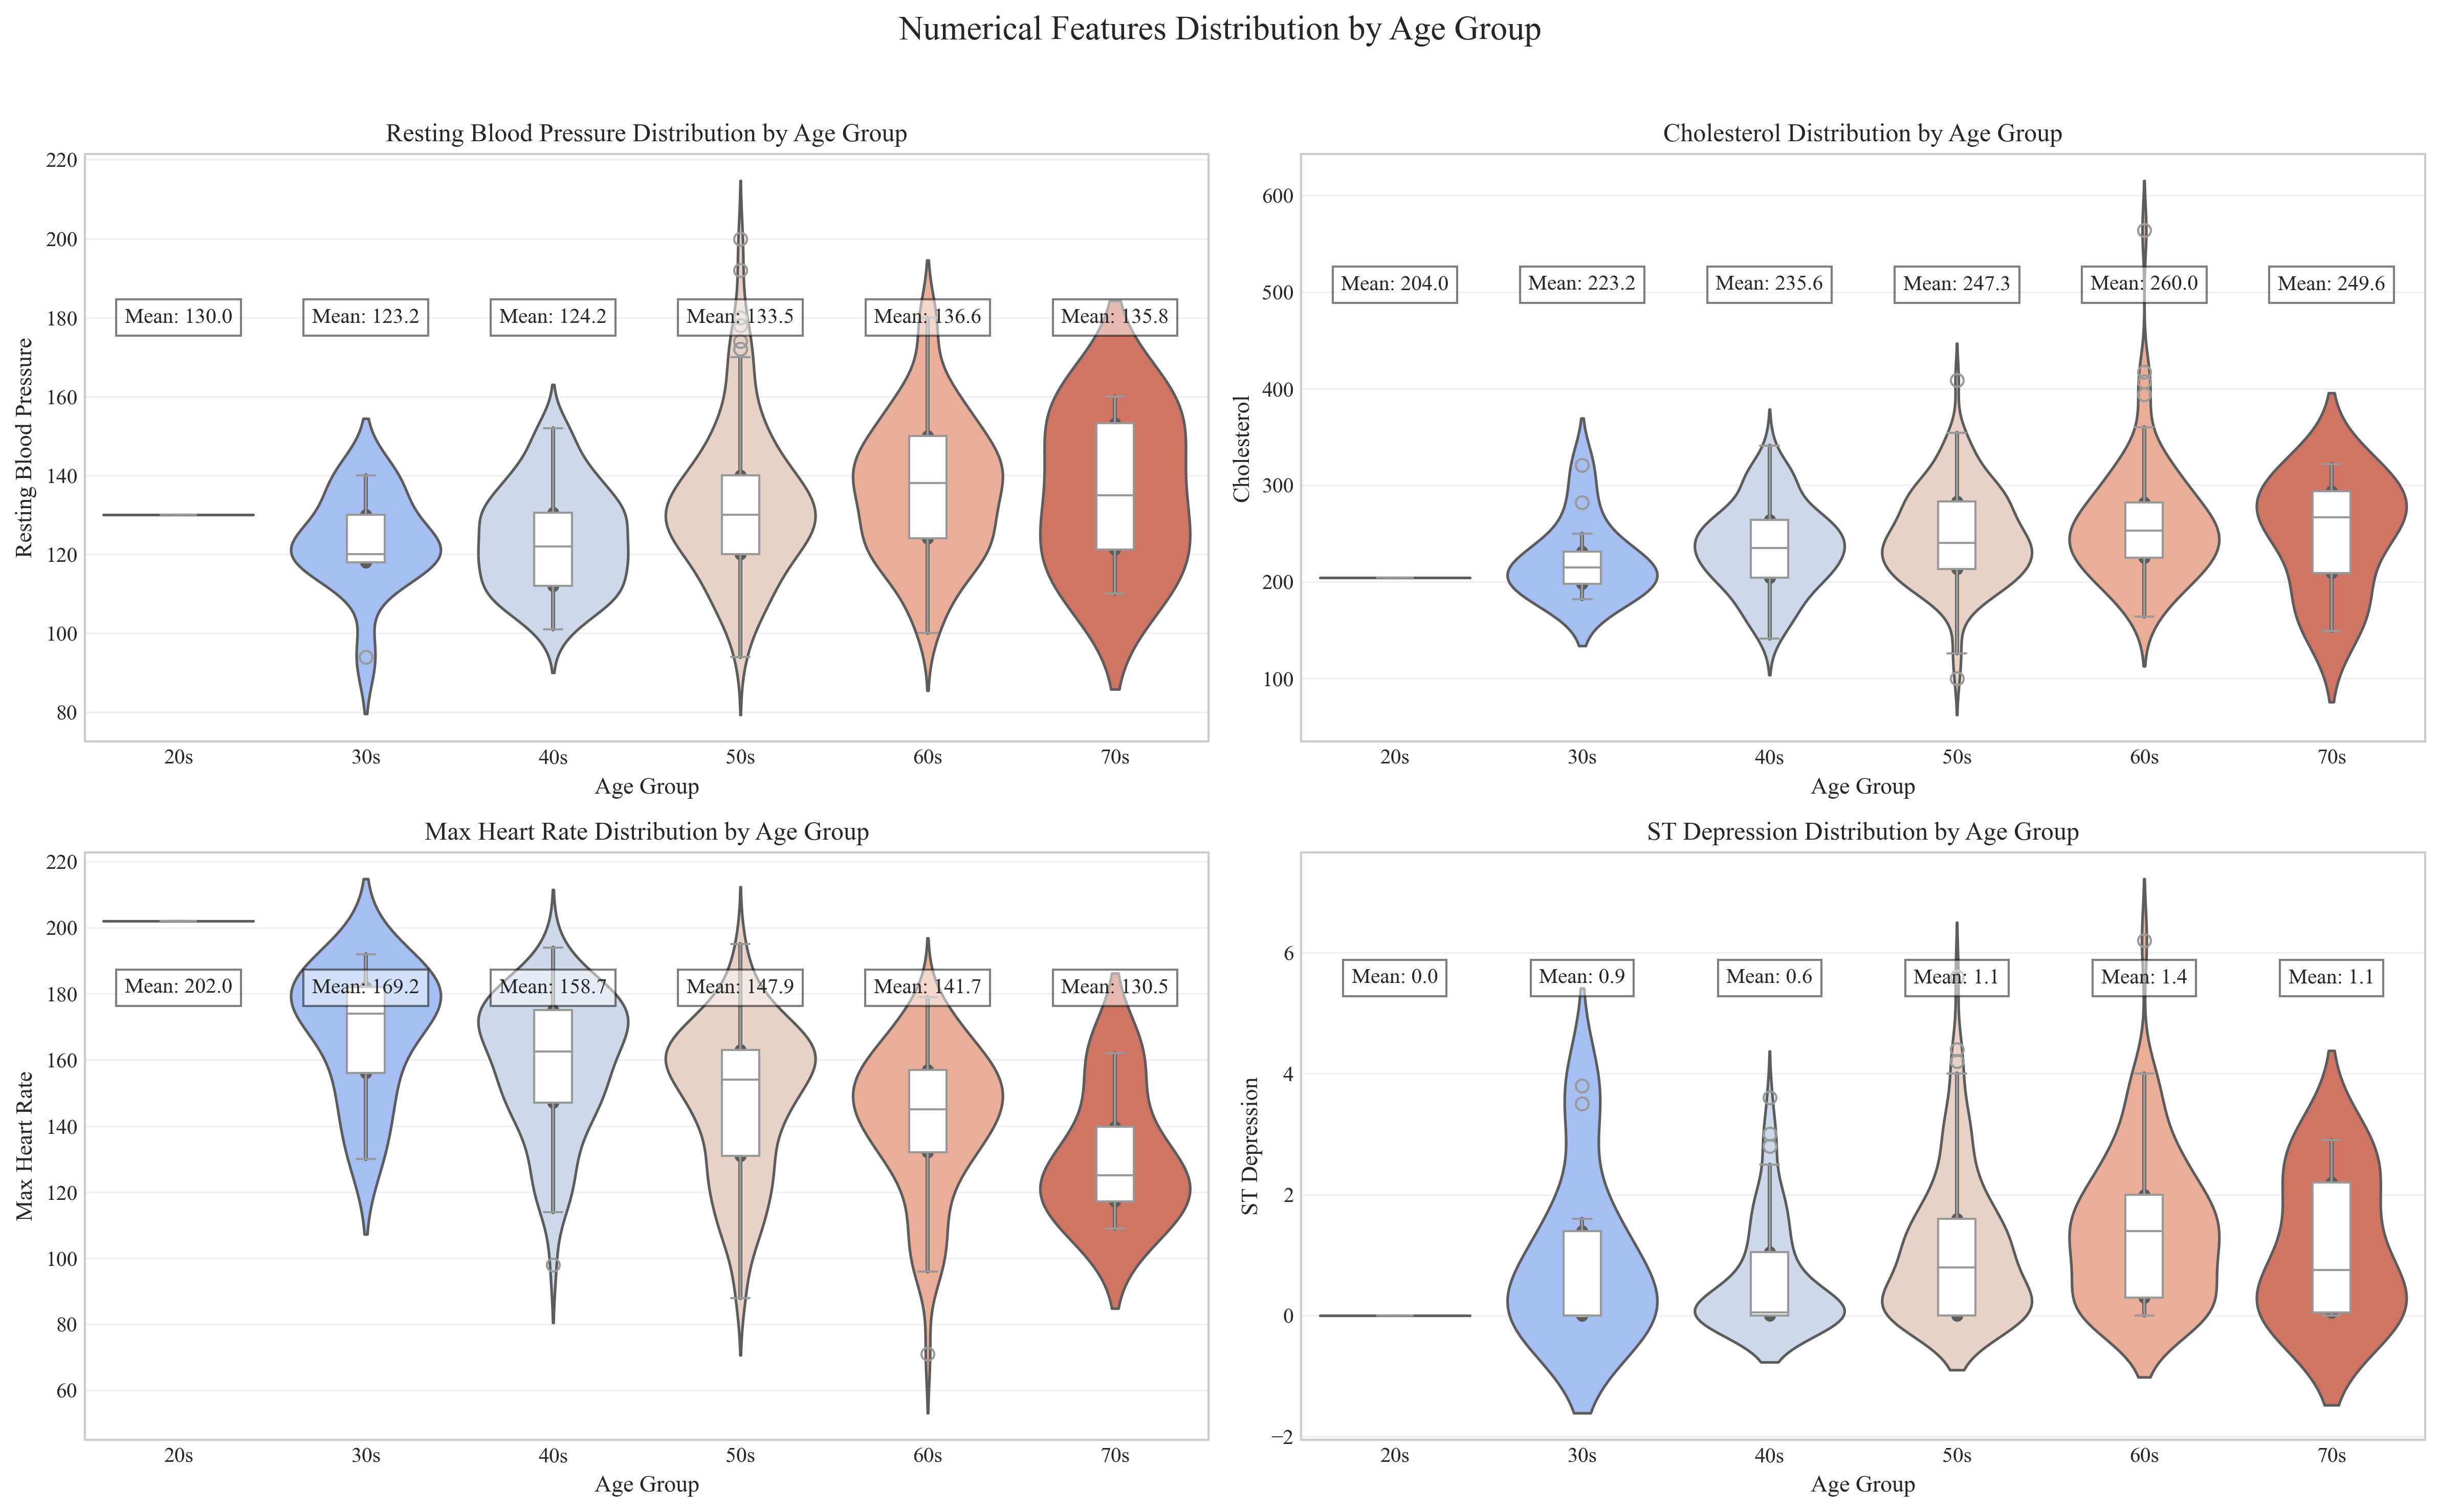

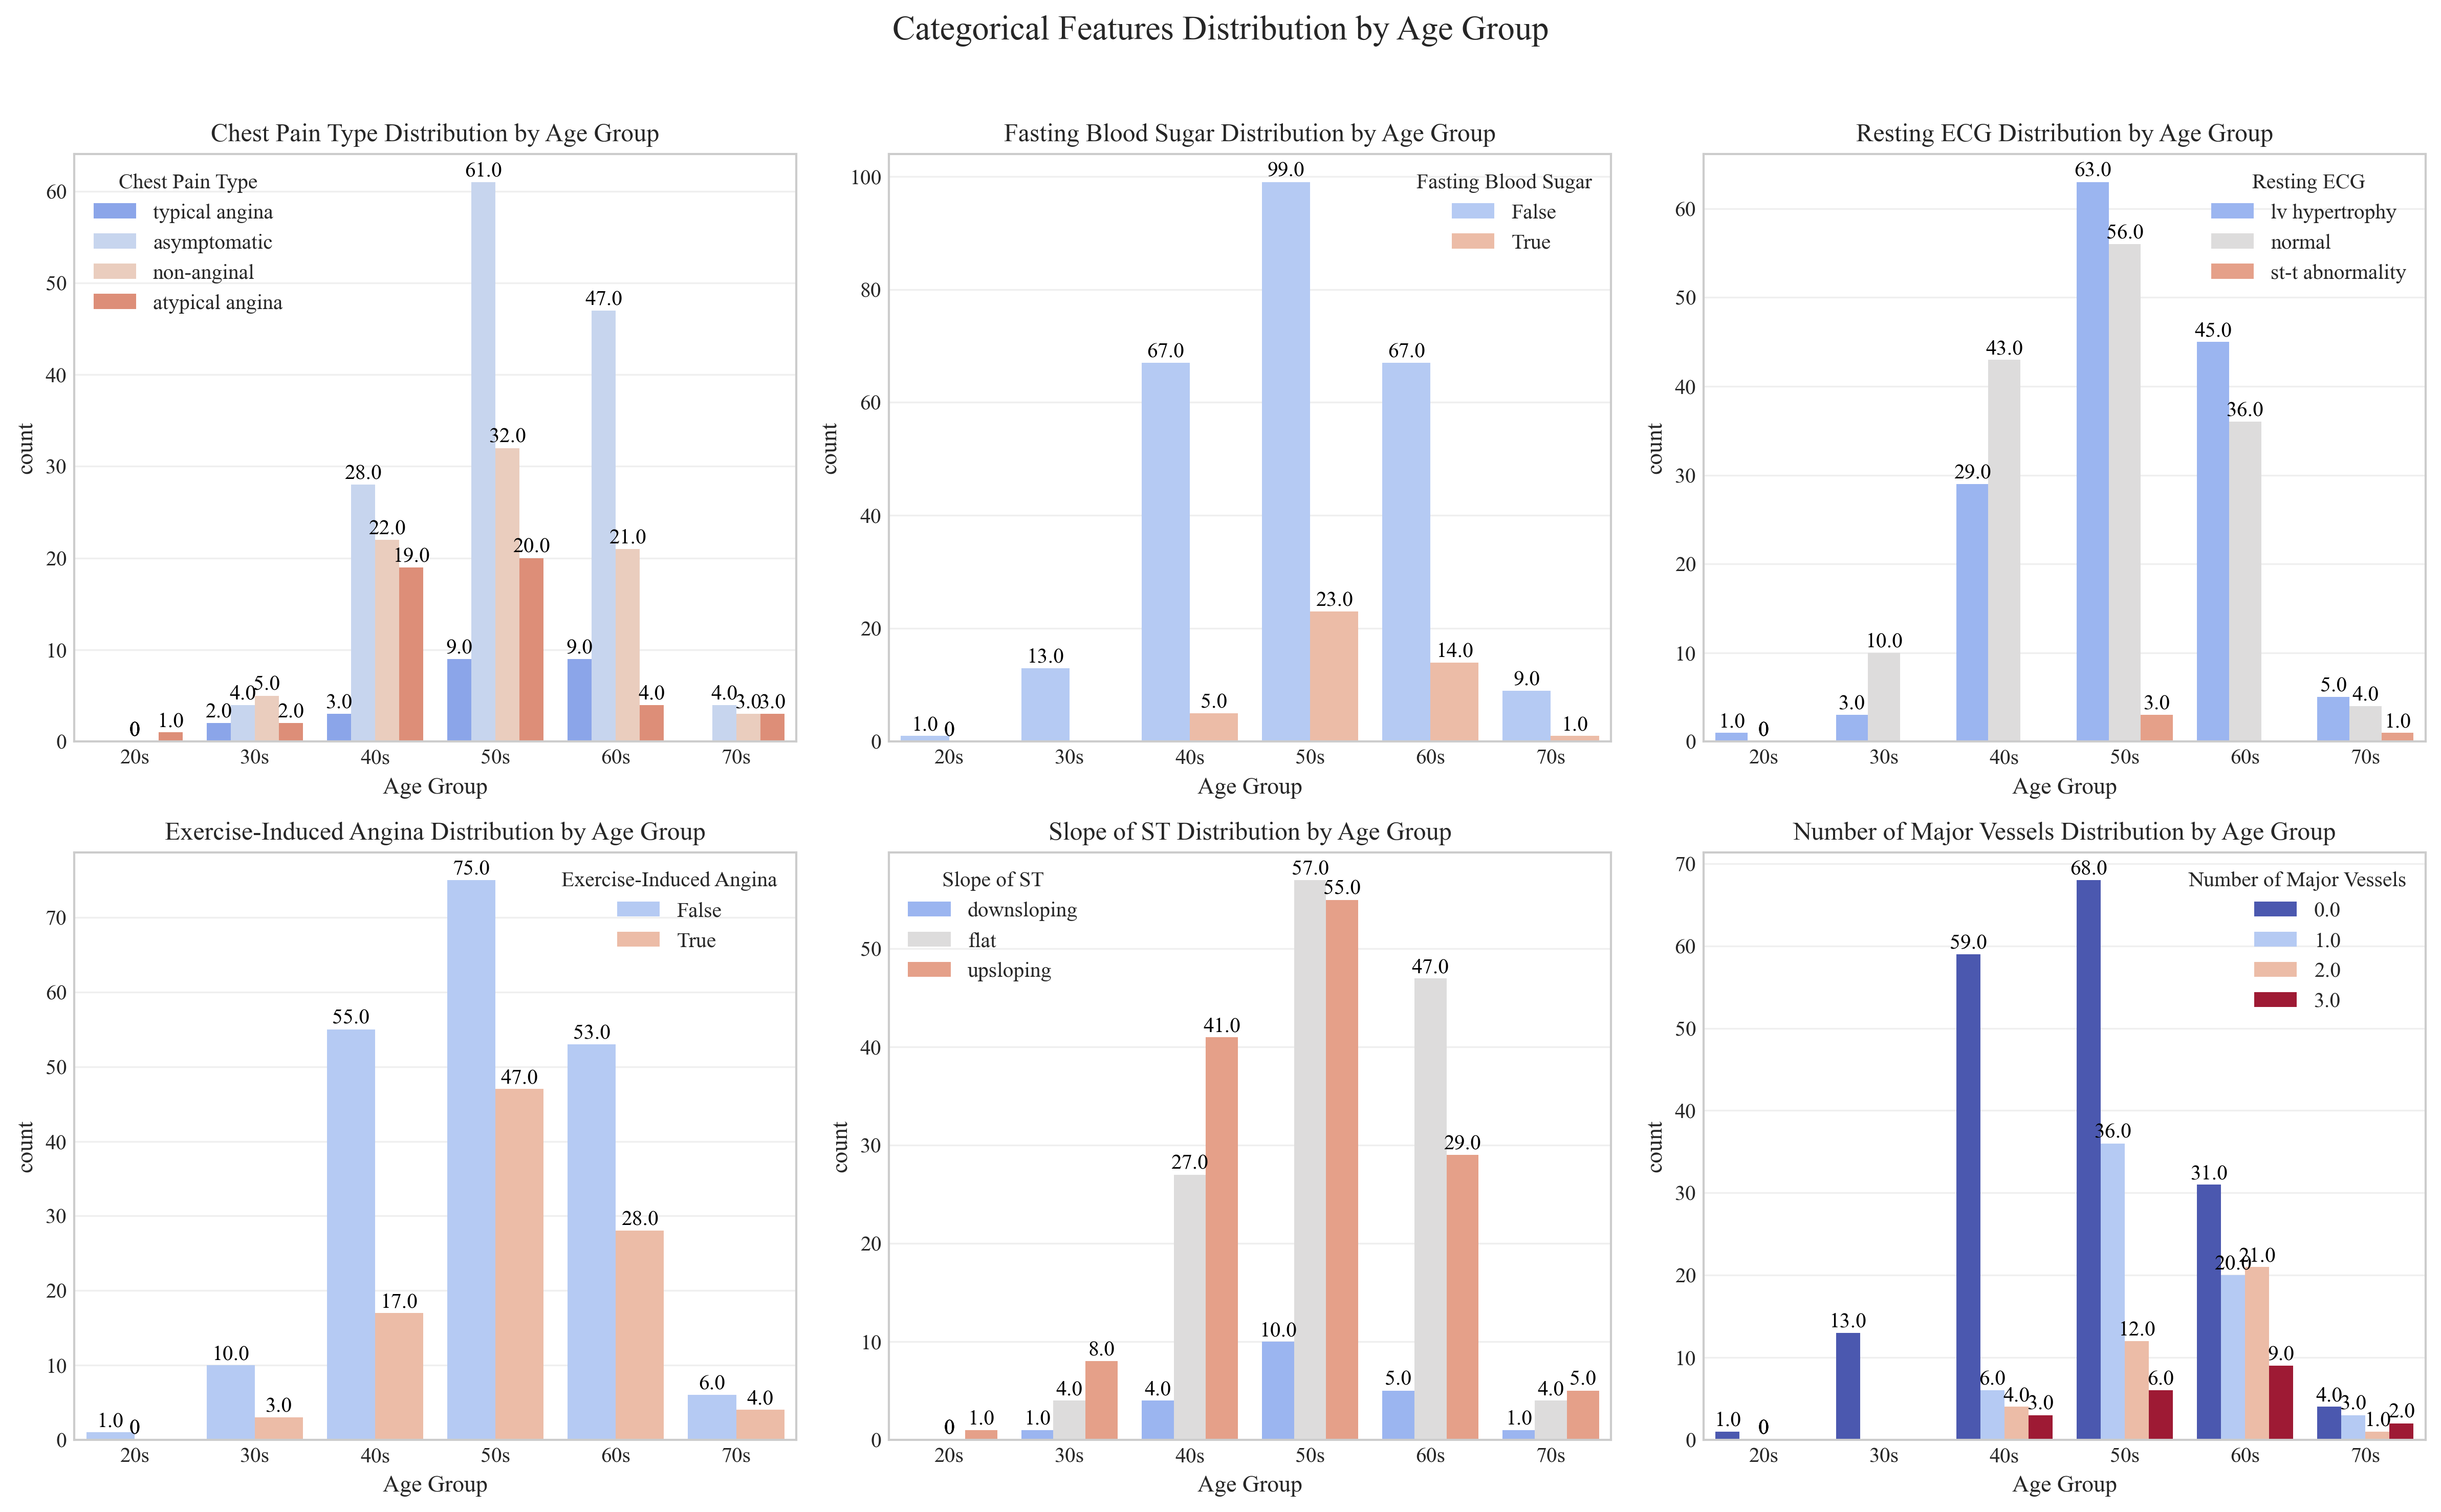

In [7]:
df['Age Group'] = pd.cut(df['Age'], bins=range(20, 81, 10), right=False, labels=[f"{i}s" for i in range(20, 80, 10)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
age_counts = df['Age Group'].value_counts().sort_index()
sns.barplot(x=age_counts.index, y=age_counts.values, ax=ax1, color='cornflowerblue')
ax1.set_title('Age Distribution in Dataset', fontsize=14)
ax1.set_ylabel('Count')
ax1.grid(axis='y', alpha=0.3)
total = age_counts.sum()
for i, v in enumerate(age_counts.values):
    percentage = v / total * 100
    ax1.text(i, v + 5, f"{v} ({percentage:.1f}%)", ha='center')
age_diagnosis = df.groupby('Age Group')['Diagnosis'].mean().reset_index()
sns.barplot(x='Age Group', y='Diagnosis', data=age_diagnosis, ax=ax2, color='salmon')
ax2.set_title('Heart Disease Rate by Age Group', fontsize=14)
ax2.set_ylabel('Heart Disease Rate')
ax2.set_ylim(0, 1)
ax2.grid(axis='y', alpha=0.3)
for i, v in enumerate(age_diagnosis['Diagnosis']):
    ax2.text(i, v + 0.03, f"{v*100:.1f}%", ha='center')
plt.tight_layout()
plt.show()

numerical_features = ['Resting Blood Pressure', 'Cholesterol', 'Max Heart Rate', 'ST Depression']
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()
for i, feature in enumerate(numerical_features):
    if i < len(axes):
        sns.violinplot(x='Age Group', y=feature, data=df, ax=axes[i], palette='coolwarm')
        sns.boxplot(x='Age Group', y=feature, data=df, ax=axes[i], width=0.2, color='white', boxprops={'zorder': 2})
        axes[i].set_title(f'{feature} Distribution by Age Group', fontsize=12)
        axes[i].grid(axis='y', alpha=0.3)
        means = df.groupby('Age Group')[feature].mean()
        for j, age_group in enumerate(means.index):
            axes[i].text(j, df[feature].max() * 0.9, f"Mean: {means[age_group]:.1f}", ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.suptitle('Numerical Features Distribution by Age Group', fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

categorical_features = ['Chest Pain Type', 'Fasting Blood Sugar', 'Resting ECG', 'Exercise-Induced Angina', 'Slope of ST', 'Number of Major Vessels']
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()
for i, feature in enumerate(categorical_features):
    if i < len(axes):
        sns.countplot(x='Age Group', hue=feature, data=df, ax=axes[i], palette='coolwarm')
        axes[i].set_title(f'{feature} Distribution by Age Group', fontsize=12)
        axes[i].grid(axis='y', alpha=0.3)
        for p in axes[i].patches:
            axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.suptitle('Categorical Features Distribution by Age Group', fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Bias Exploration - Sex

/var/folders/7j/4lx45fps5wsbdg7_v2jkwytm0000gn/T/ipykernel_60421/2230143090.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values,
/var/folders/7j/4lx45fps5wsbdg7_v2jkwytm0000gn/T/ipykernel_60421/2230143090.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Diagnosis', data=gender_diagnosis,


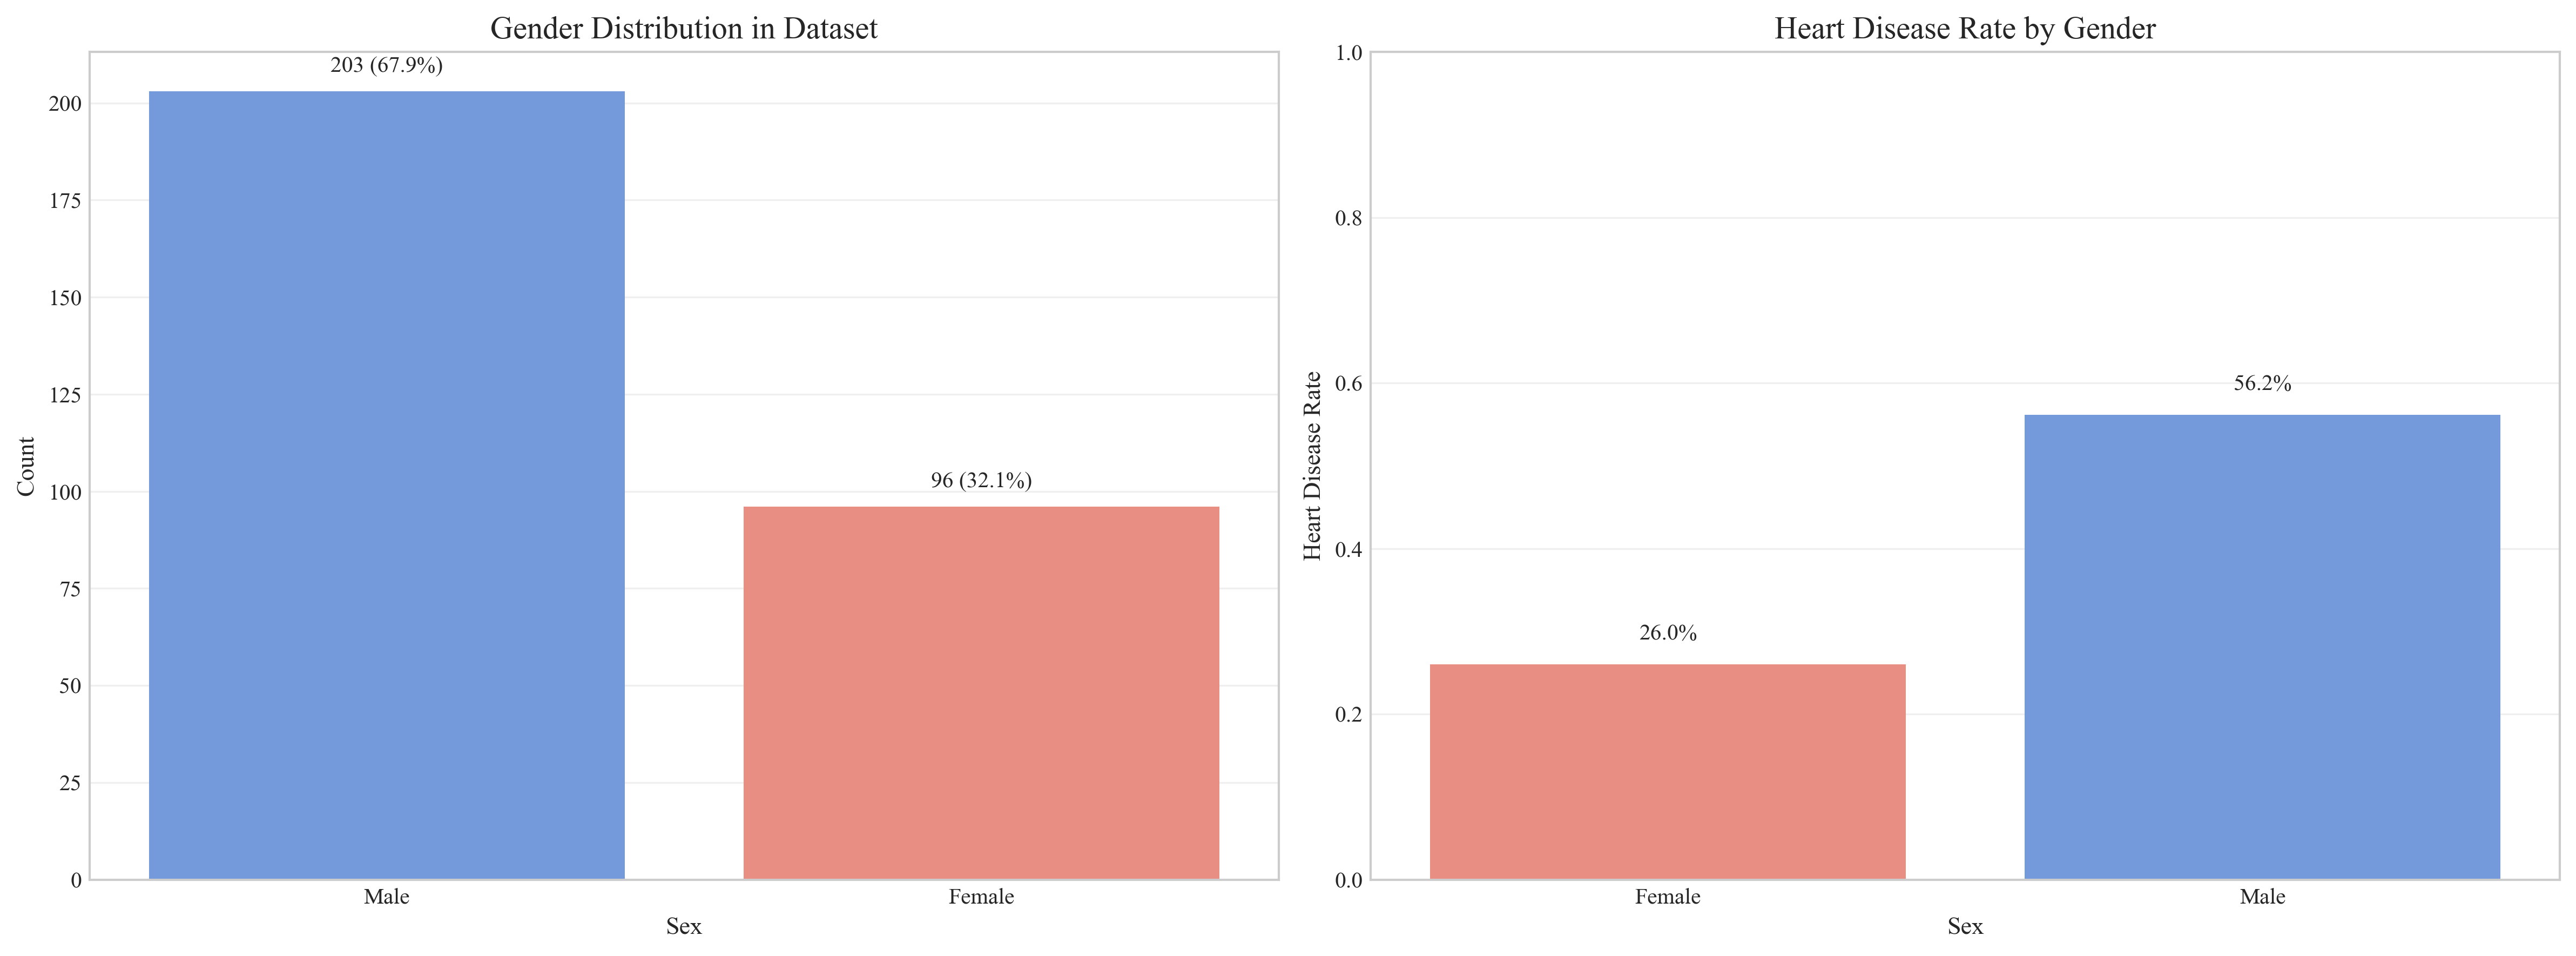

/var/folders/7j/4lx45fps5wsbdg7_v2jkwytm0000gn/T/ipykernel_60421/2230143090.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sex', y=feature, data=df, ax=axes[i], palette=[female_color, male_color] if 'Female' == df['Sex'].unique()[0] else [male_color, female_color])
/var/folders/7j/4lx45fps5wsbdg7_v2jkwytm0000gn/T/ipykernel_60421/2230143090.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sex', y=feature, data=df, ax=axes[i], palette=[female_color, male_color] if 'Female' == df['Sex'].unique()[0] else [male_color, female_color])
/var/folders/7j/4lx45fps5wsbdg7_v2jkwytm0000gn/T/ipykernel_60421/2230143090.py:34: FutureWarning: 

Passing `palette` without assigning `hue` 

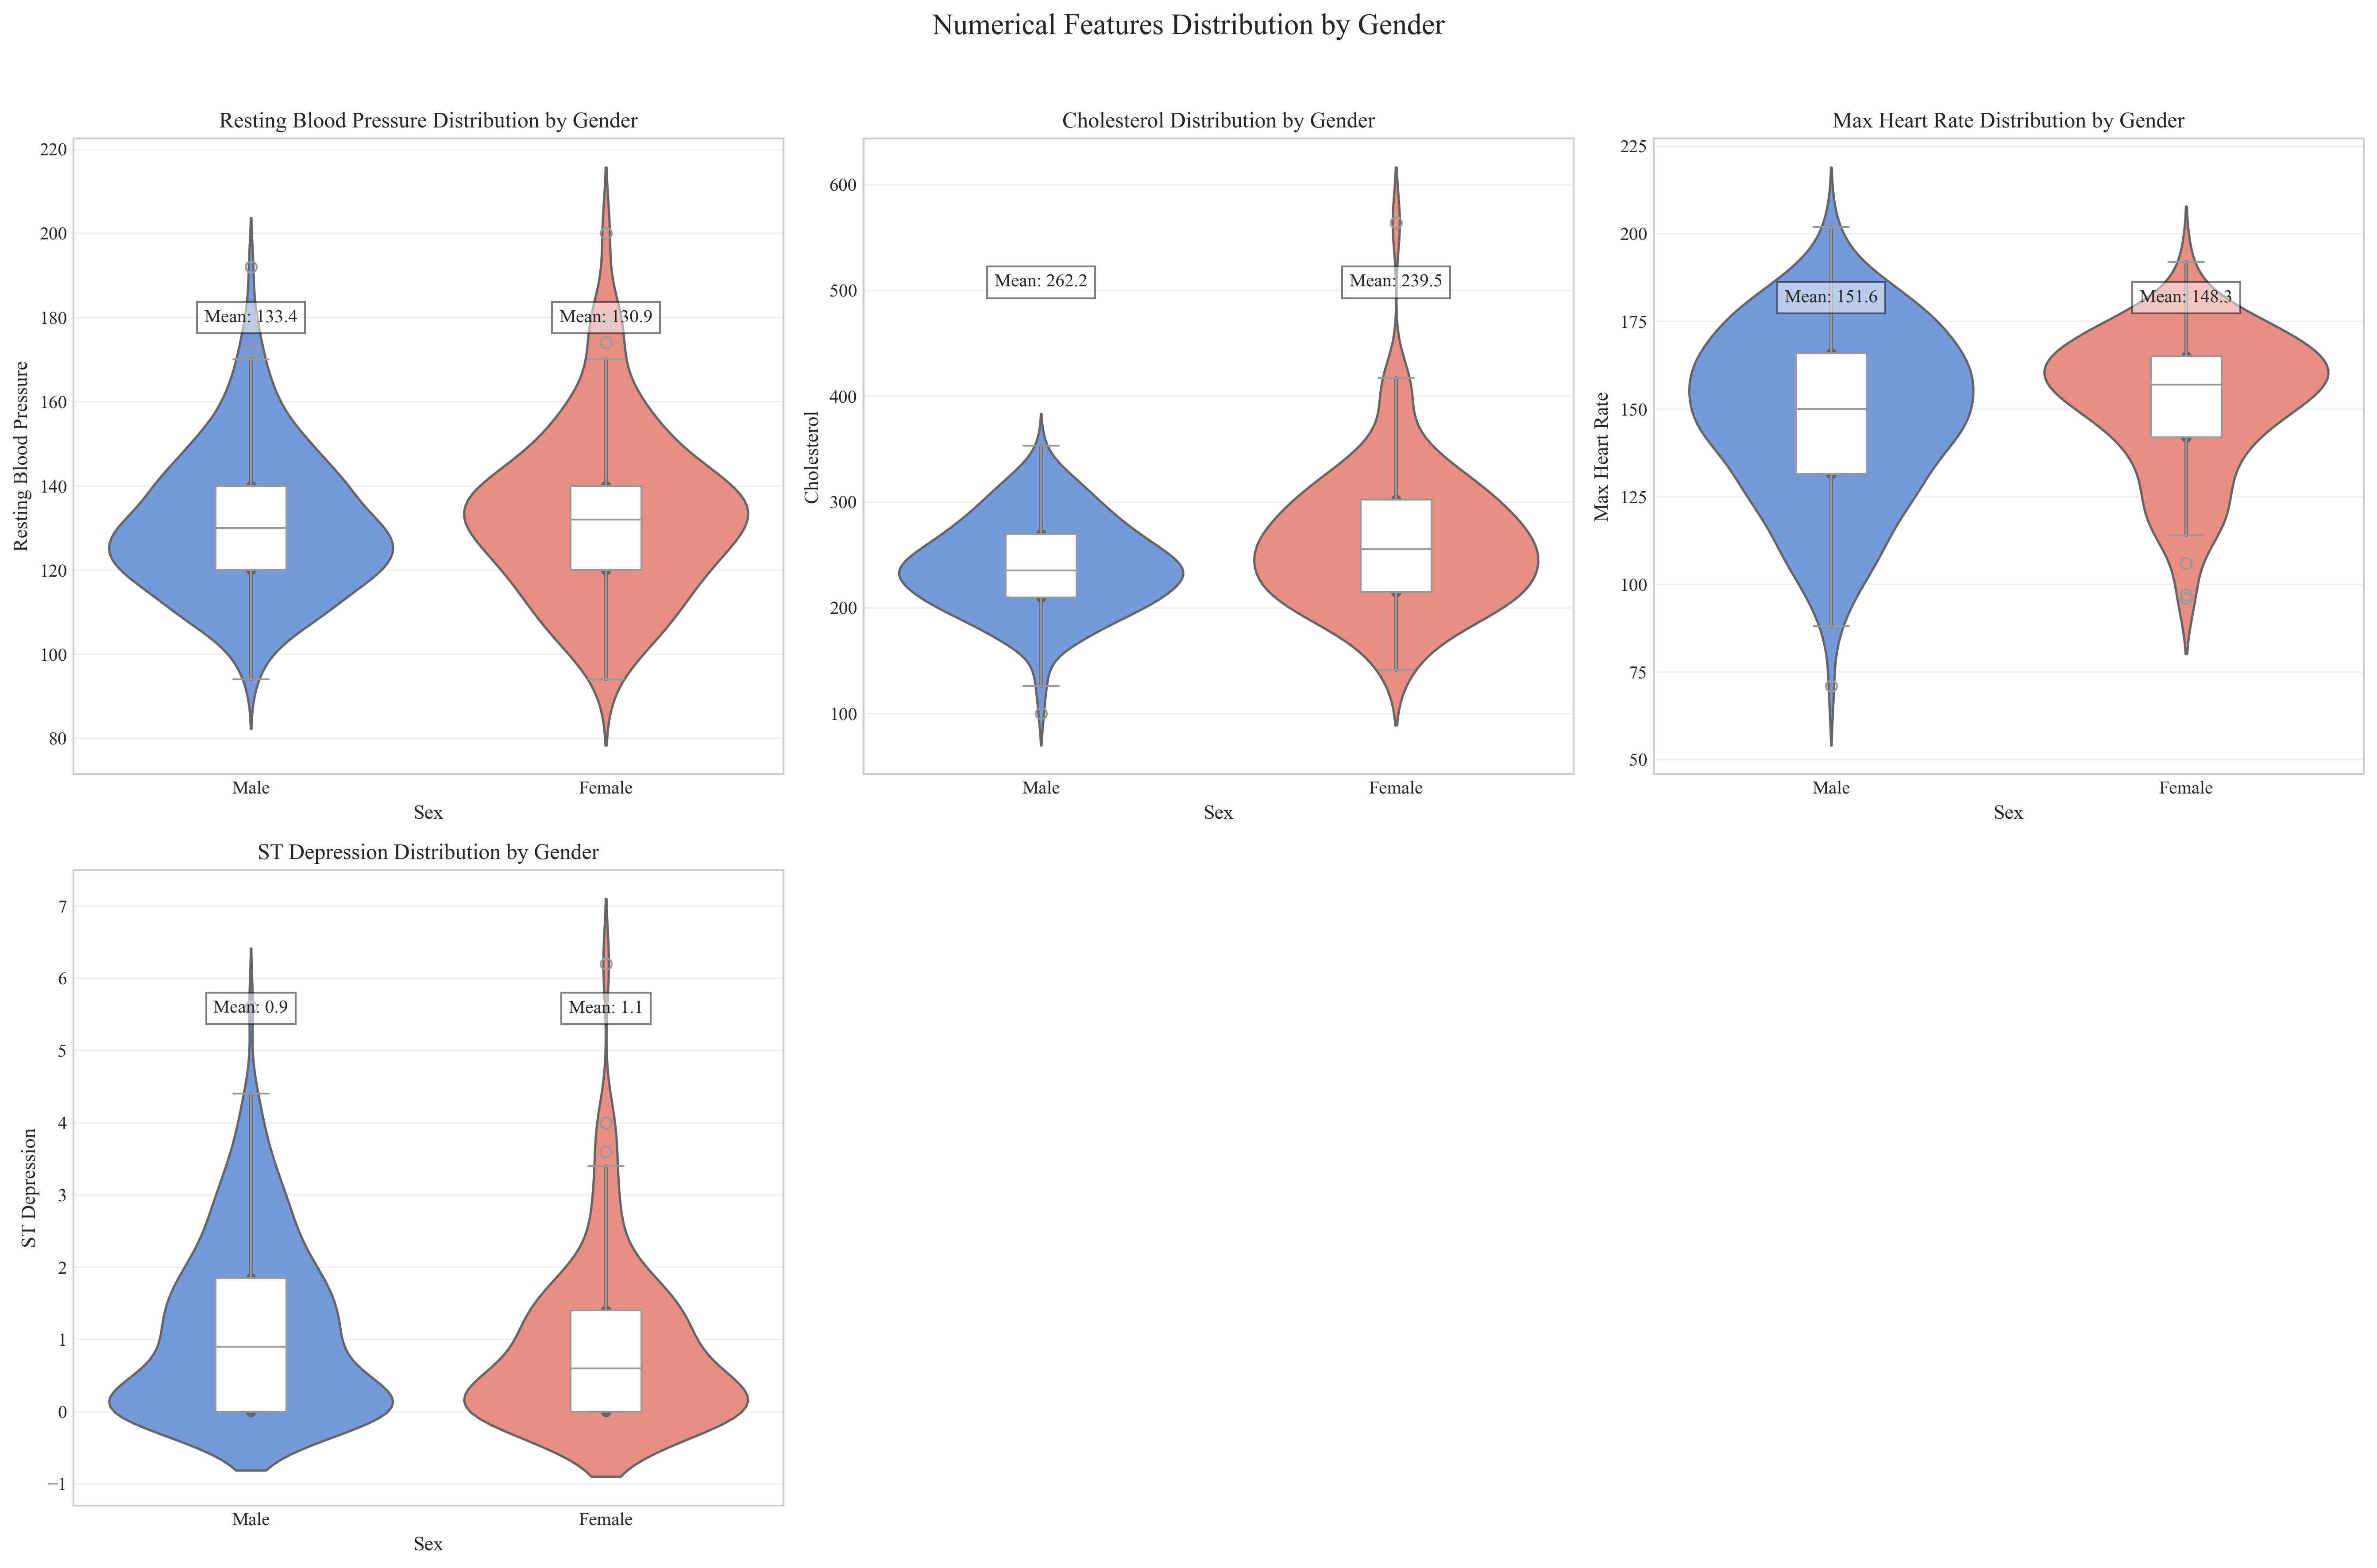

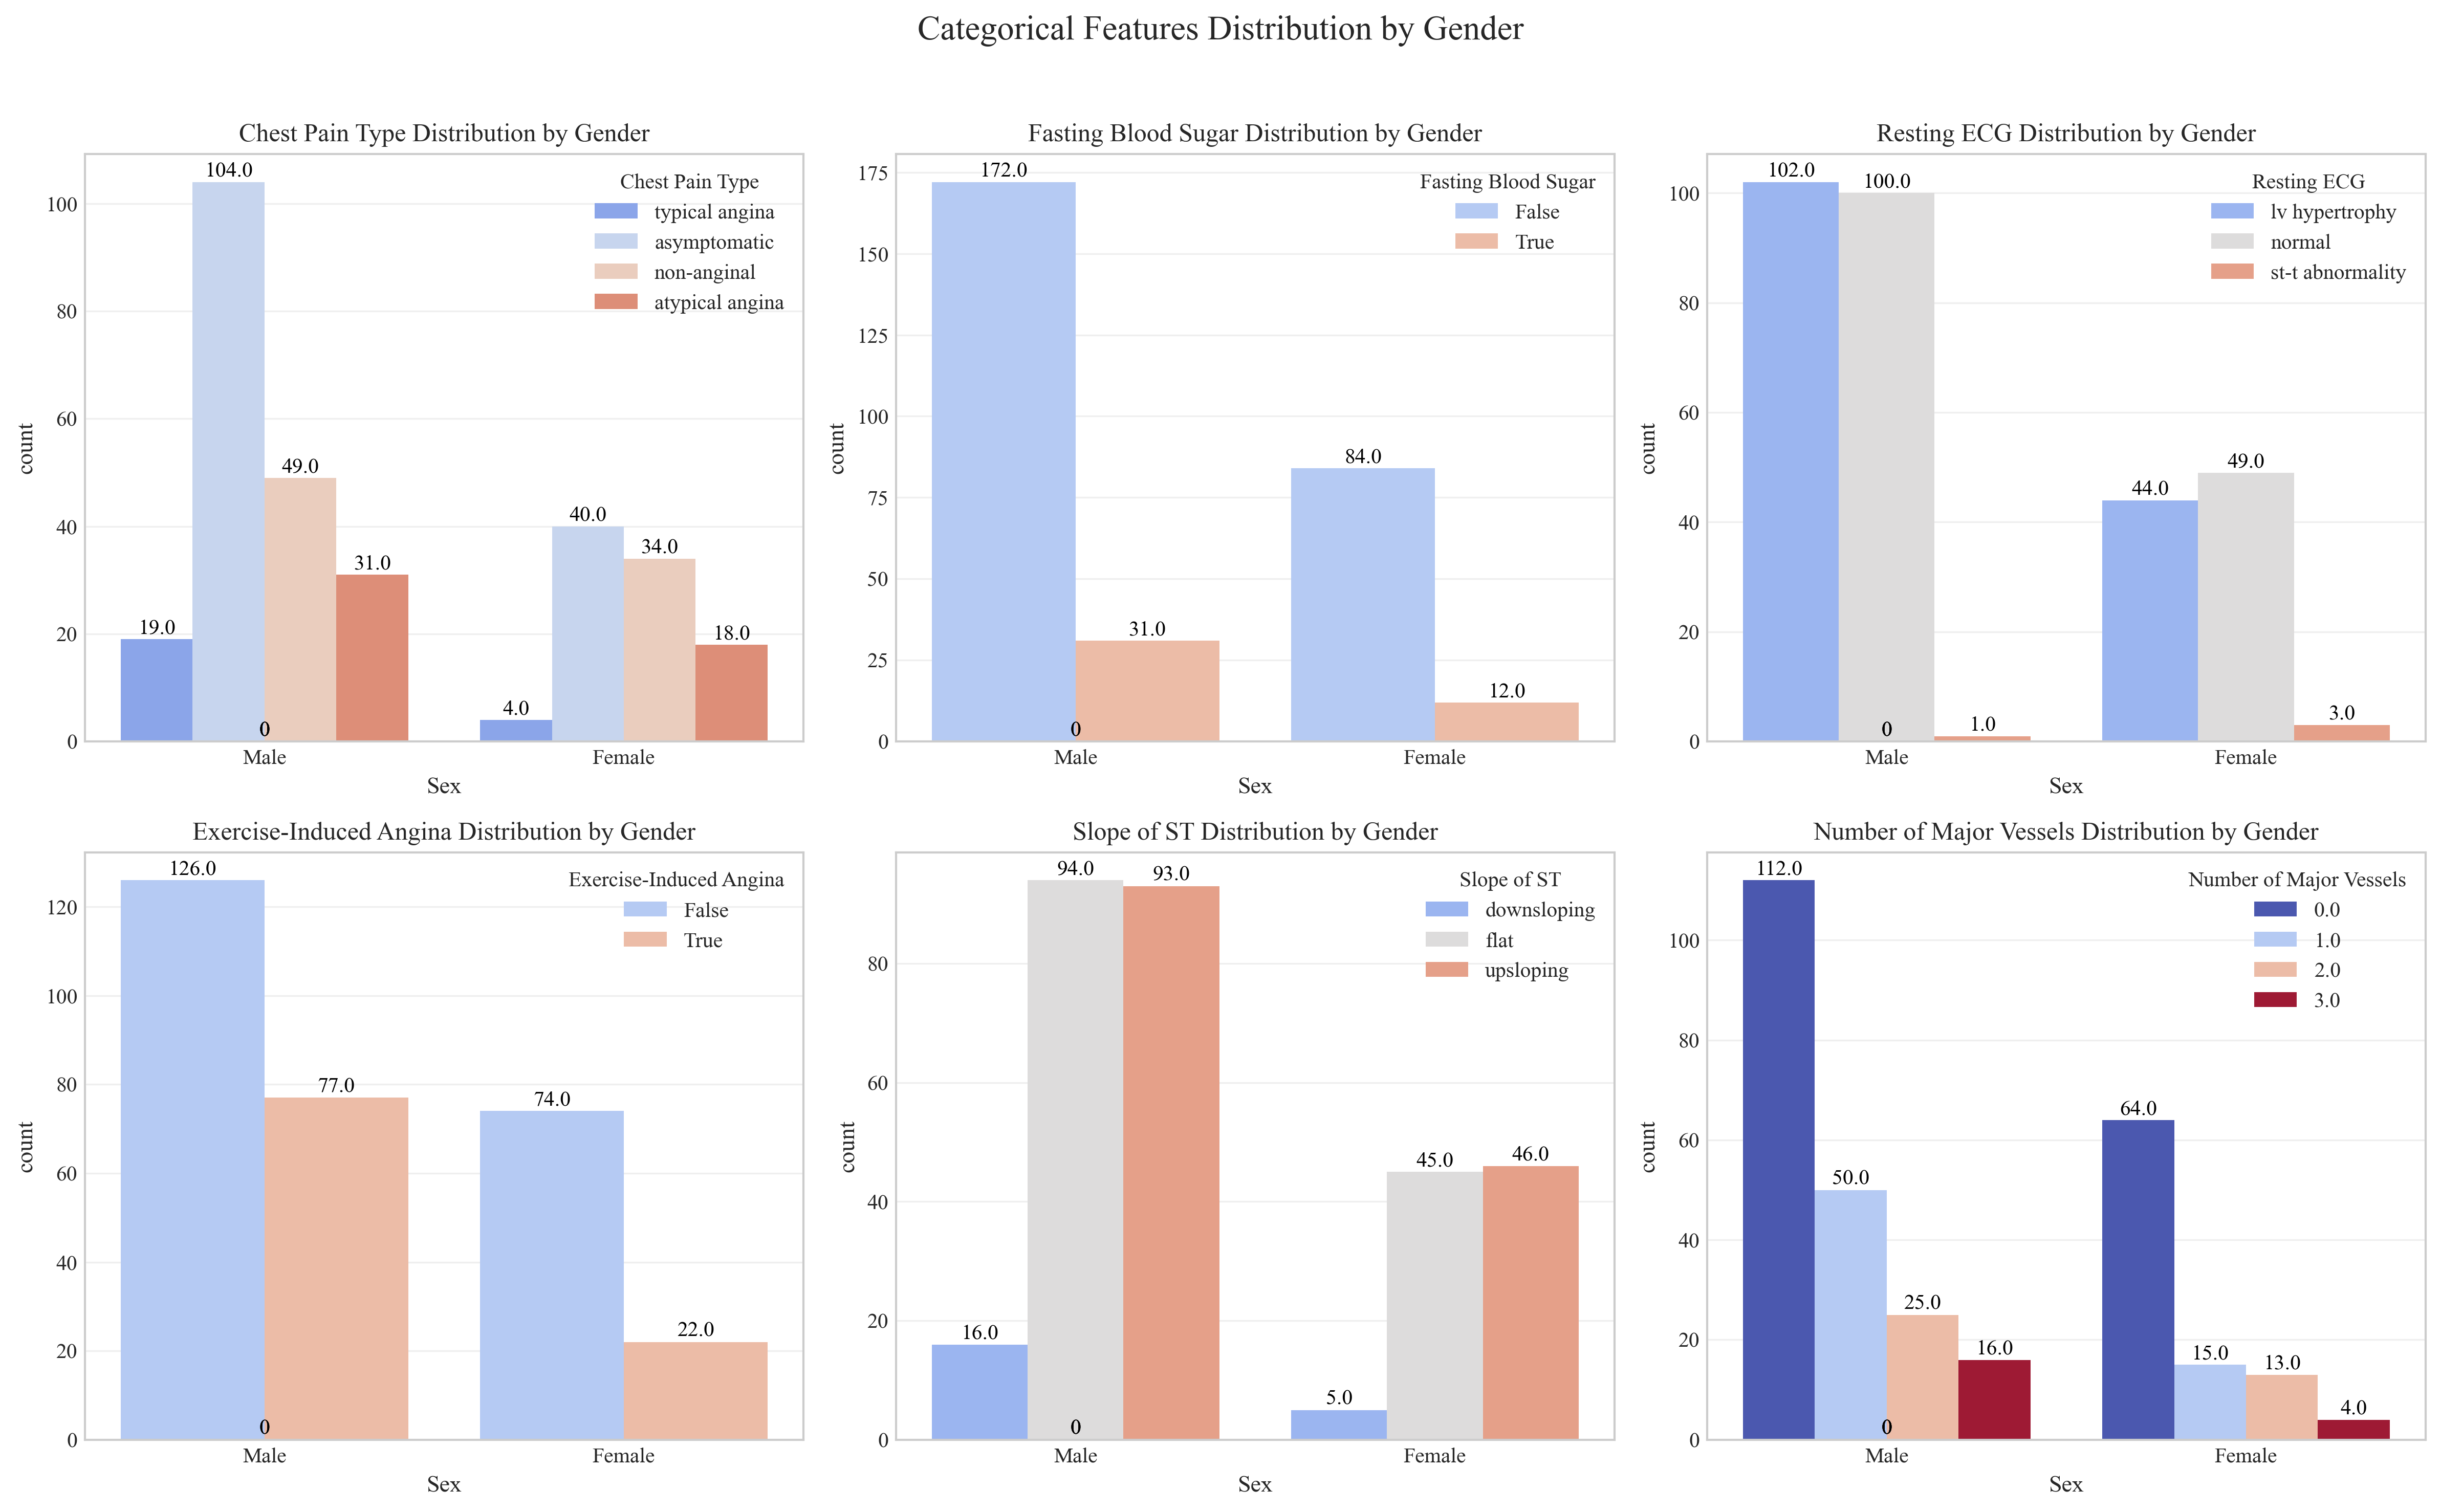

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

gender_counts = df['Sex'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, 
            palette=[female_color, male_color] if 'Female' in gender_counts.index[0] else [male_color, female_color],
            ax=ax1)
ax1.set_title('Gender Distribution in Dataset', fontsize=14)
ax1.set_ylabel('Count')
ax1.grid(axis='y', alpha=0.3)
total = gender_counts.sum()
for i, v in enumerate(gender_counts.values):
    ax1.text(i, v + 5, f"{v} ({(v / total * 100):.1f}%)", ha='center')


gender_diagnosis = df.groupby('Sex')['Diagnosis'].mean().reset_index()
sns.barplot(x='Sex', y='Diagnosis', data=gender_diagnosis, 
            palette=[female_color, male_color] if 'Female' == gender_diagnosis['Sex'].iloc[0] else [male_color, female_color],
            ax=ax2)
ax2.set_title('Heart Disease Rate by Gender', fontsize=14)
ax2.set_ylabel('Heart Disease Rate')
ax2.set_ylim(0, 1)
ax2.grid(axis='y', alpha=0.3)
for i, v in enumerate(gender_diagnosis['Diagnosis']):
    ax2.text(i, v + 0.03, f"{(v * 100):.1f}%", ha='center')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    if i < len(axes):
        sns.violinplot(x='Sex', y=feature, data=df, ax=axes[i], palette=[female_color, male_color] if 'Female' == df['Sex'].unique()[0] else [male_color, female_color])
        sns.boxplot(x='Sex', y=feature, data=df, ax=axes[i], width=0.2, color='white', boxprops={'zorder': 2})
        axes[i].set_title(f'{feature} Distribution by Gender', fontsize=12)
        axes[i].grid(axis='y', alpha=0.3)
        means = df.groupby('Sex')[feature].mean()
        for j, sex in enumerate(means.index):
            axes[i].text(j, df[feature].max() * 0.9, f"Mean: {means[sex]:.1f}", ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Numerical Features Distribution by Gender', fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
            


fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()
for i, feature in enumerate(categorical_features):
    if i < len(axes):
        sns.countplot(x='Sex', hue=feature, data=df, ax=axes[i], palette='coolwarm')
        axes[i].set_title(f'{feature} Distribution by Gender', fontsize=12)
        axes[i].grid(axis='y', alpha=0.3)
        for p in axes[i].patches:
            axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.suptitle('Categorical Features Distribution by Gender', fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Bias Exploration - Age and Sex

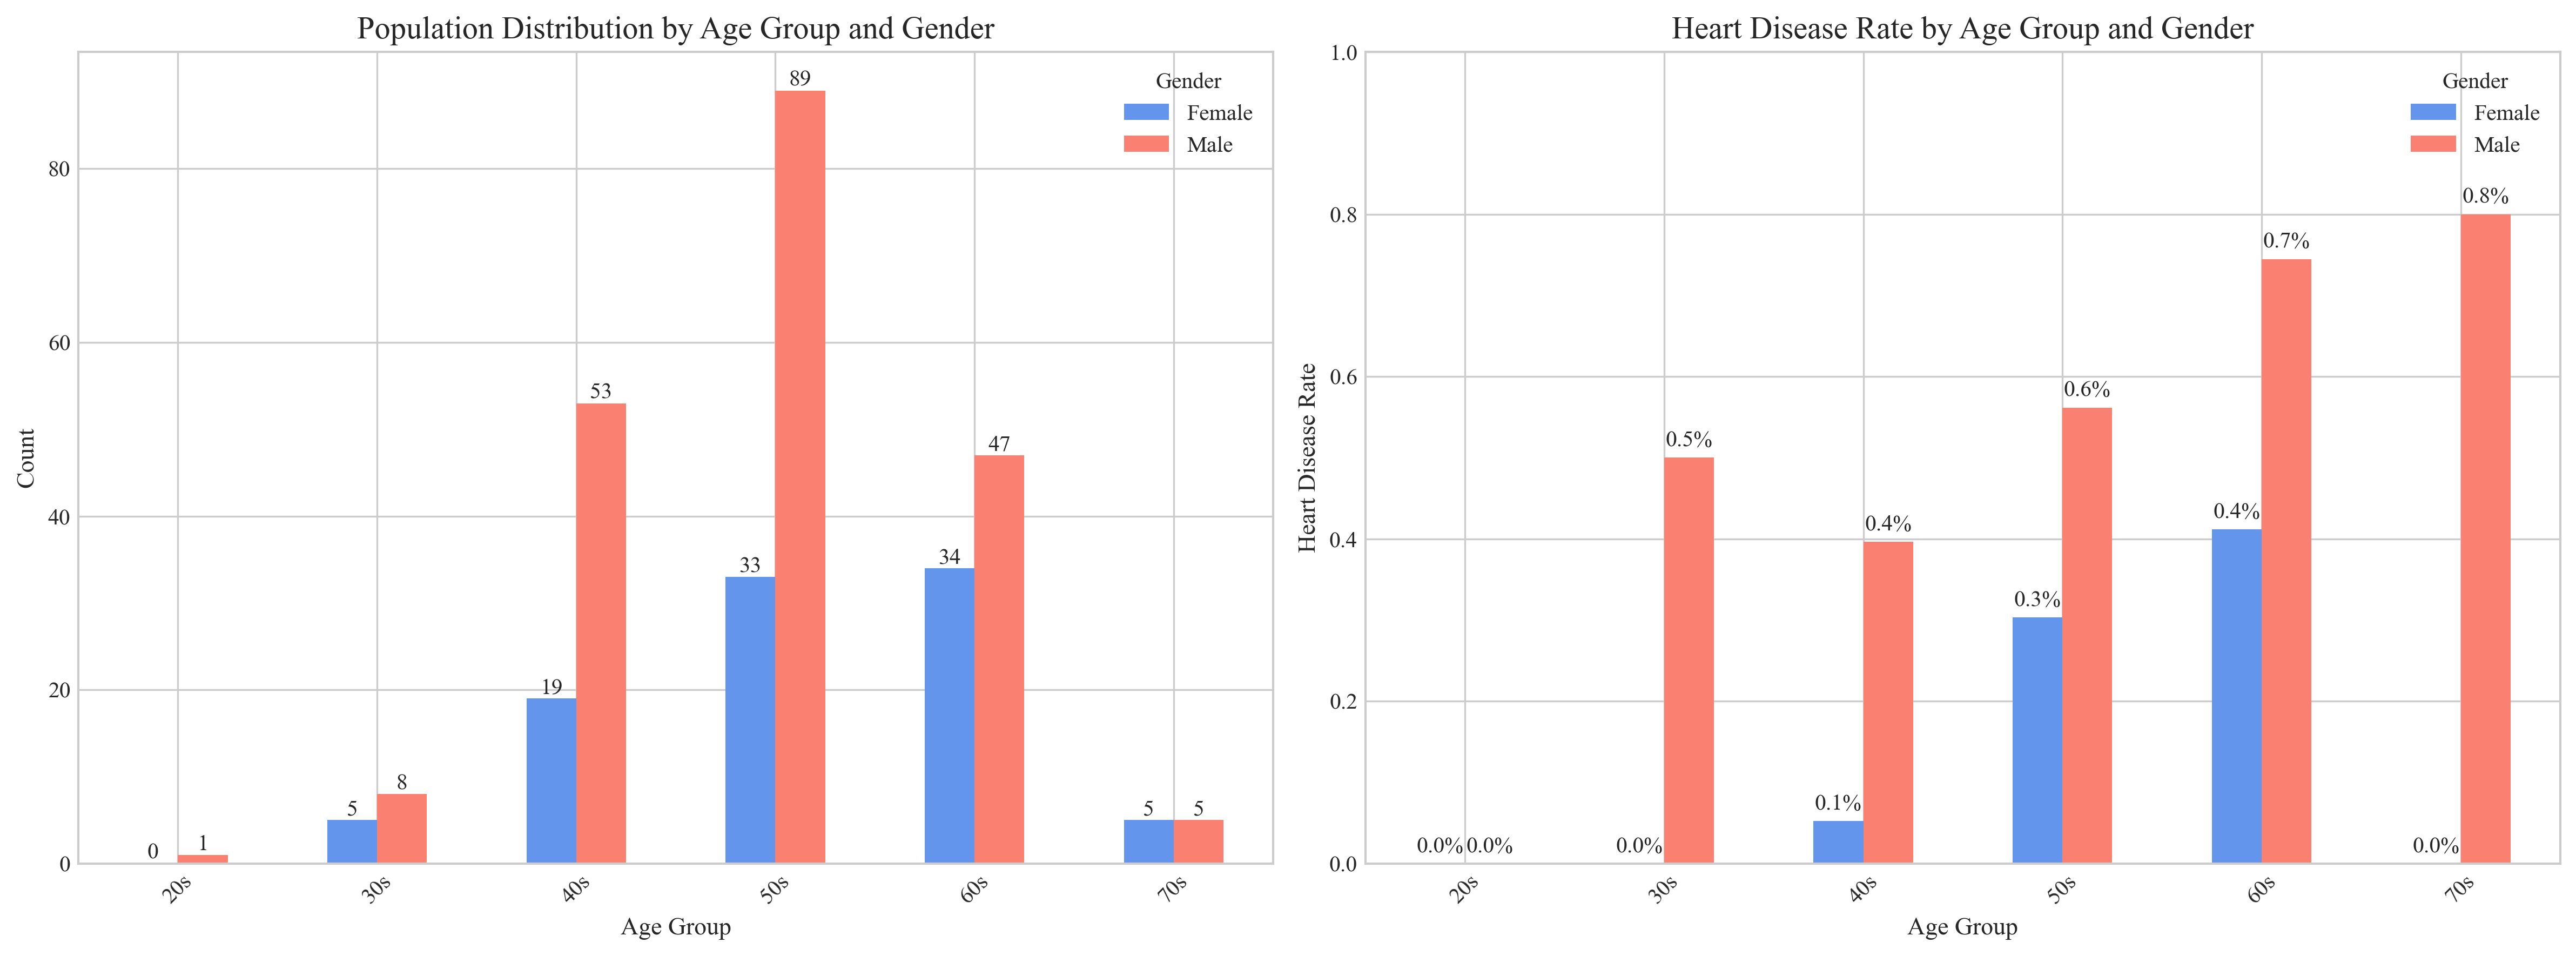

In [ ]:
group_counts = df.groupby(['Age Group', 'Sex']).size().unstack()
group_diagnosis = df.groupby(['Age Group', 'Sex'])['Diagnosis'].mean().unstack()

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

group_counts.plot(kind='bar', stacked=False, ax=axes[0], color=[male_color, female_color])
axes[0].set_title('Population Distribution by Age Group and Gender', fontsize=14)
axes[0].set_ylabel('Count')
axes[0].legend(title='Gender')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge', fontsize=10)



group_diagnosis.plot(kind='bar', stacked=False, ax=axes[1], color=[male_color, female_color])
axes[1].set_title('Heart Disease Rate by Age Group and Gender', fontsize=14)
axes[1].set_ylabel('Heart Disease Rate')
axes[1].set_ylim(0, 1)
axes[1].legend(title='Gender')
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10, padding=3)

for ax in axes:
    ax.set_xticklabels(group_counts.index, rotation=45)

plt.tight_layout()
plt.show()


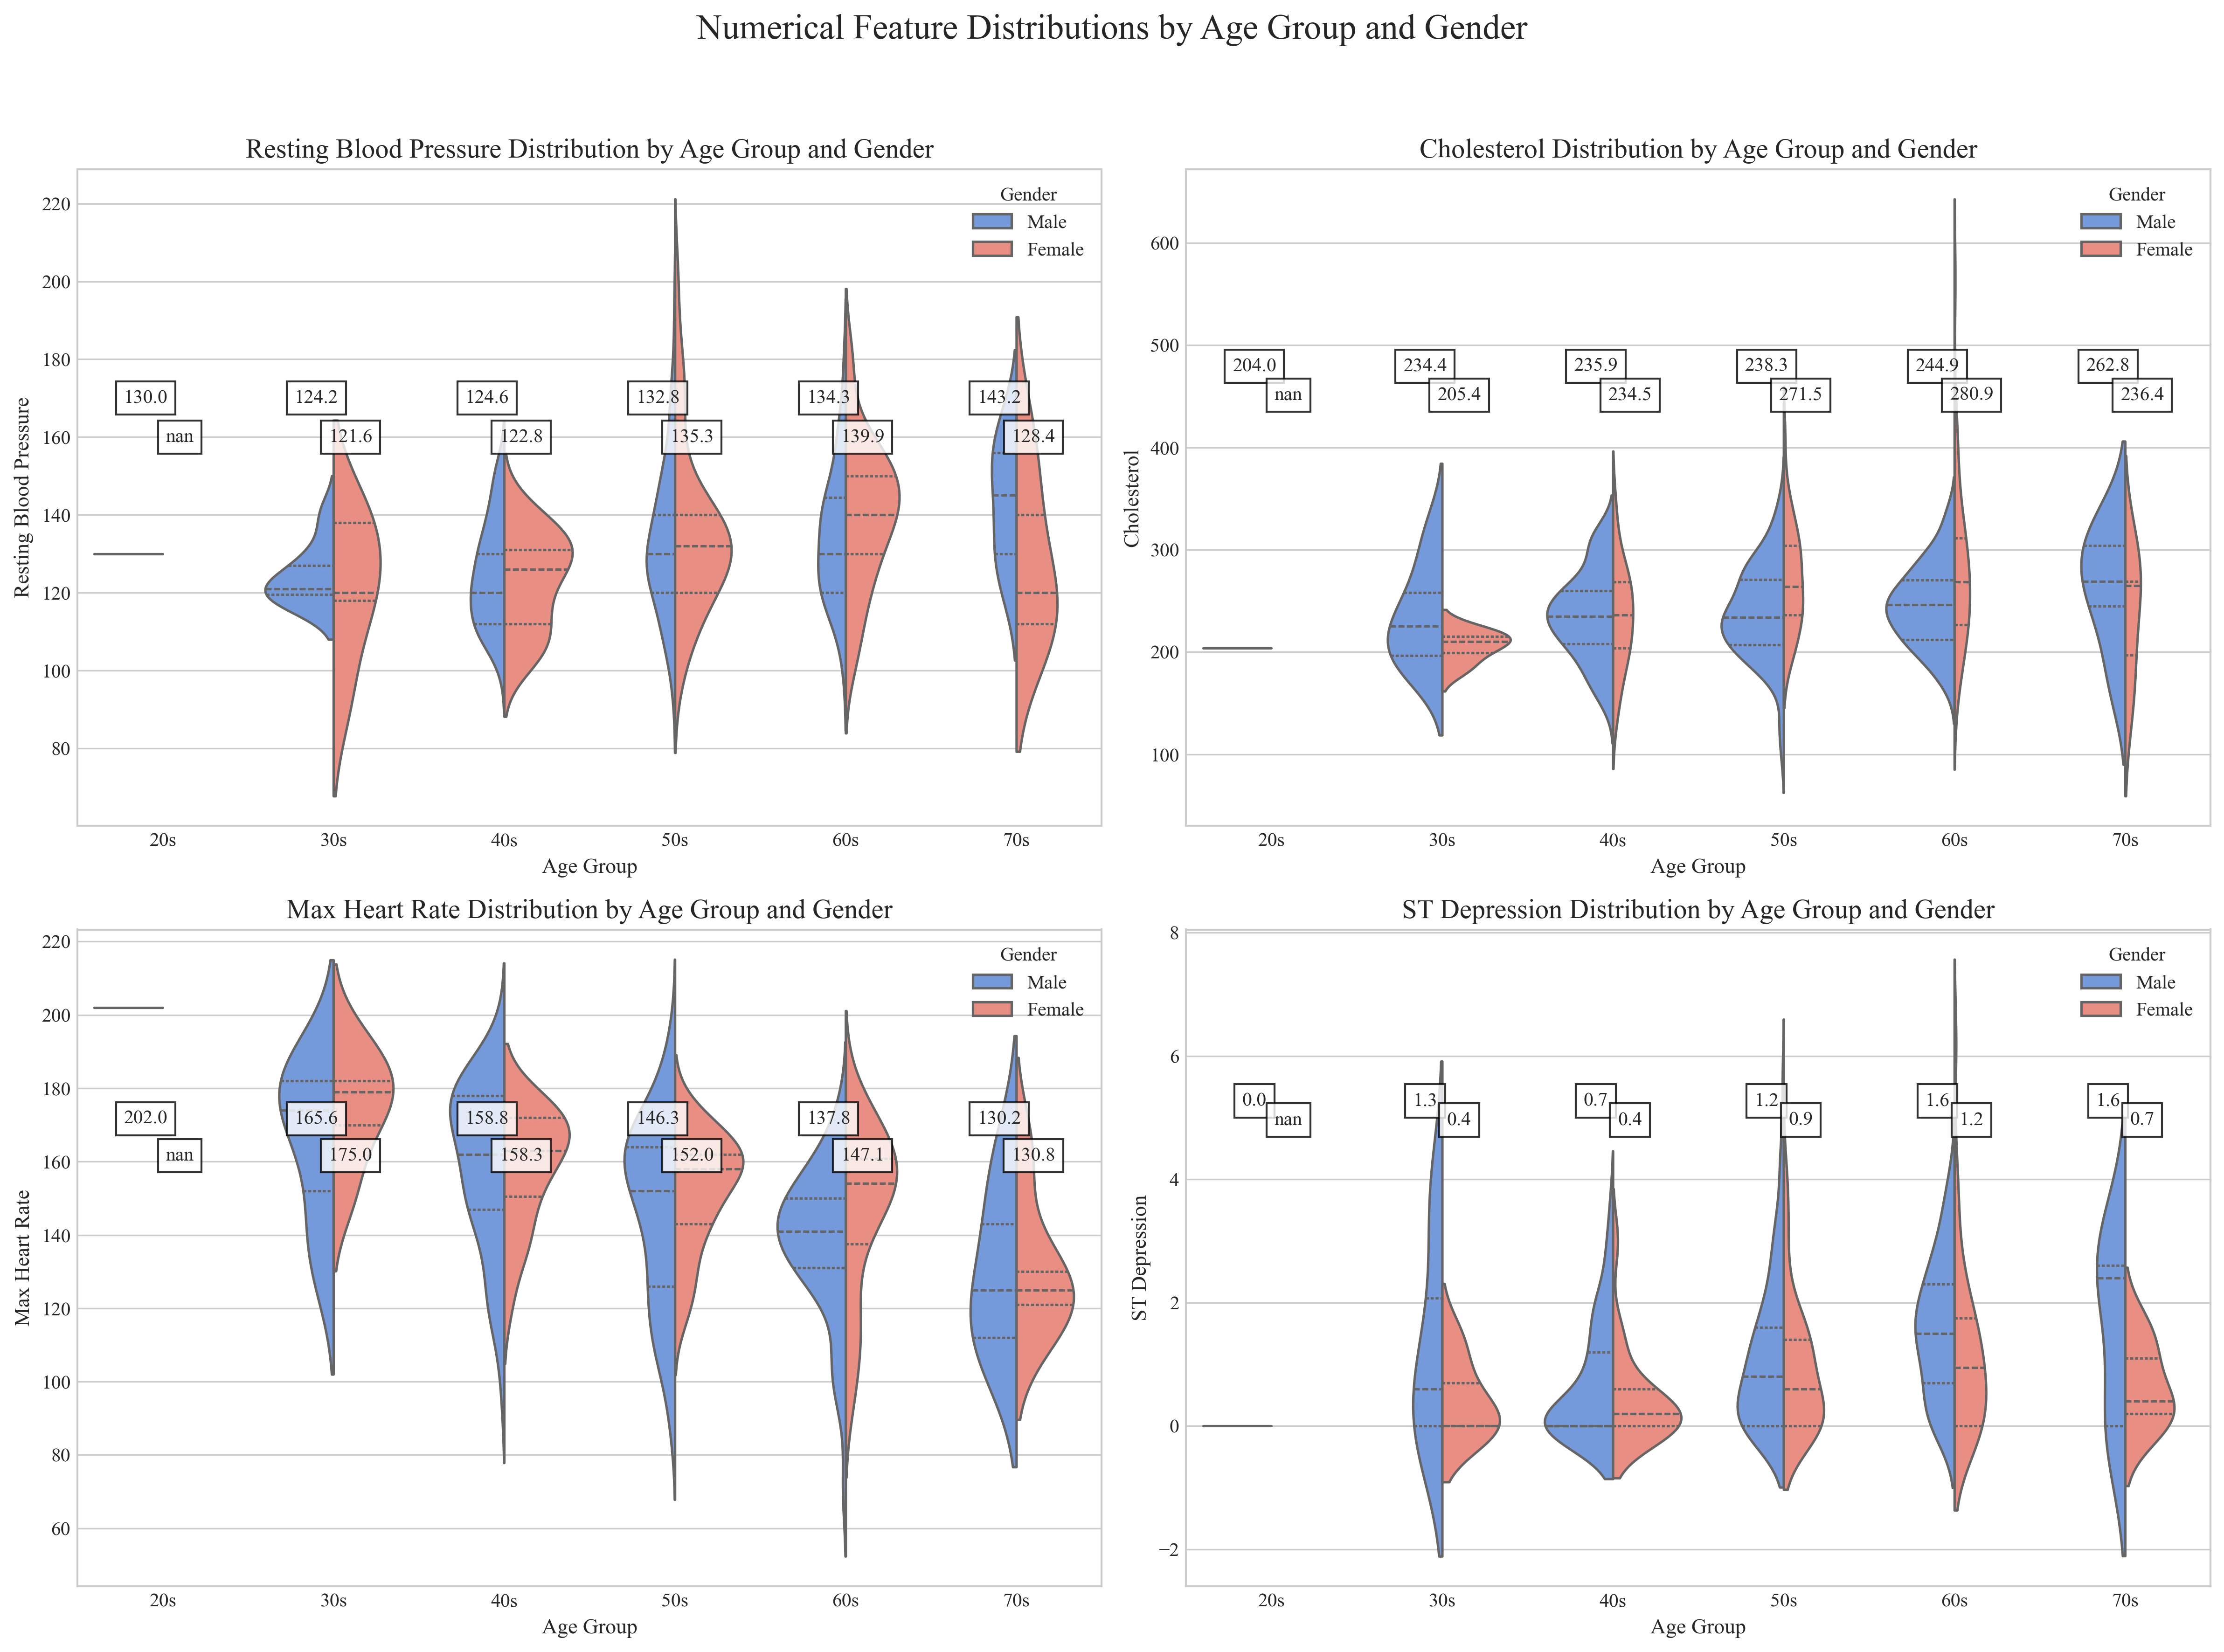

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.violinplot(
        x='Age Group', y=feature, hue='Sex', data=df, ax=axes[i],
        palette=[male_color, female_color], split=True, inner='quartile'
    )
    
    means = df.groupby(['Age Group', 'Sex'])[feature].mean().unstack()
    
    for j, age_group in enumerate(means.index):
        for k, sex in enumerate(['Male', 'Female']):
            mean_value = means.loc[age_group, sex]
            axes[i].text(
                j + 0.2 * k - 0.1, df[feature].max() * (0.85 - 0.05 * k),
                f"{mean_value:.1f}", ha='center', va='center', fontsize=10,
                bbox=dict(facecolor='white', alpha=0.8)
            )

    axes[i].set_title(f'{feature} Distribution by Age Group and Gender', fontsize=14)
    axes[i].set_xlabel('Age Group')
    axes[i].set_ylabel(feature)
    axes[i].legend(title='Gender')

plt.suptitle('Numerical Feature Distributions by Age Group and Gender', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


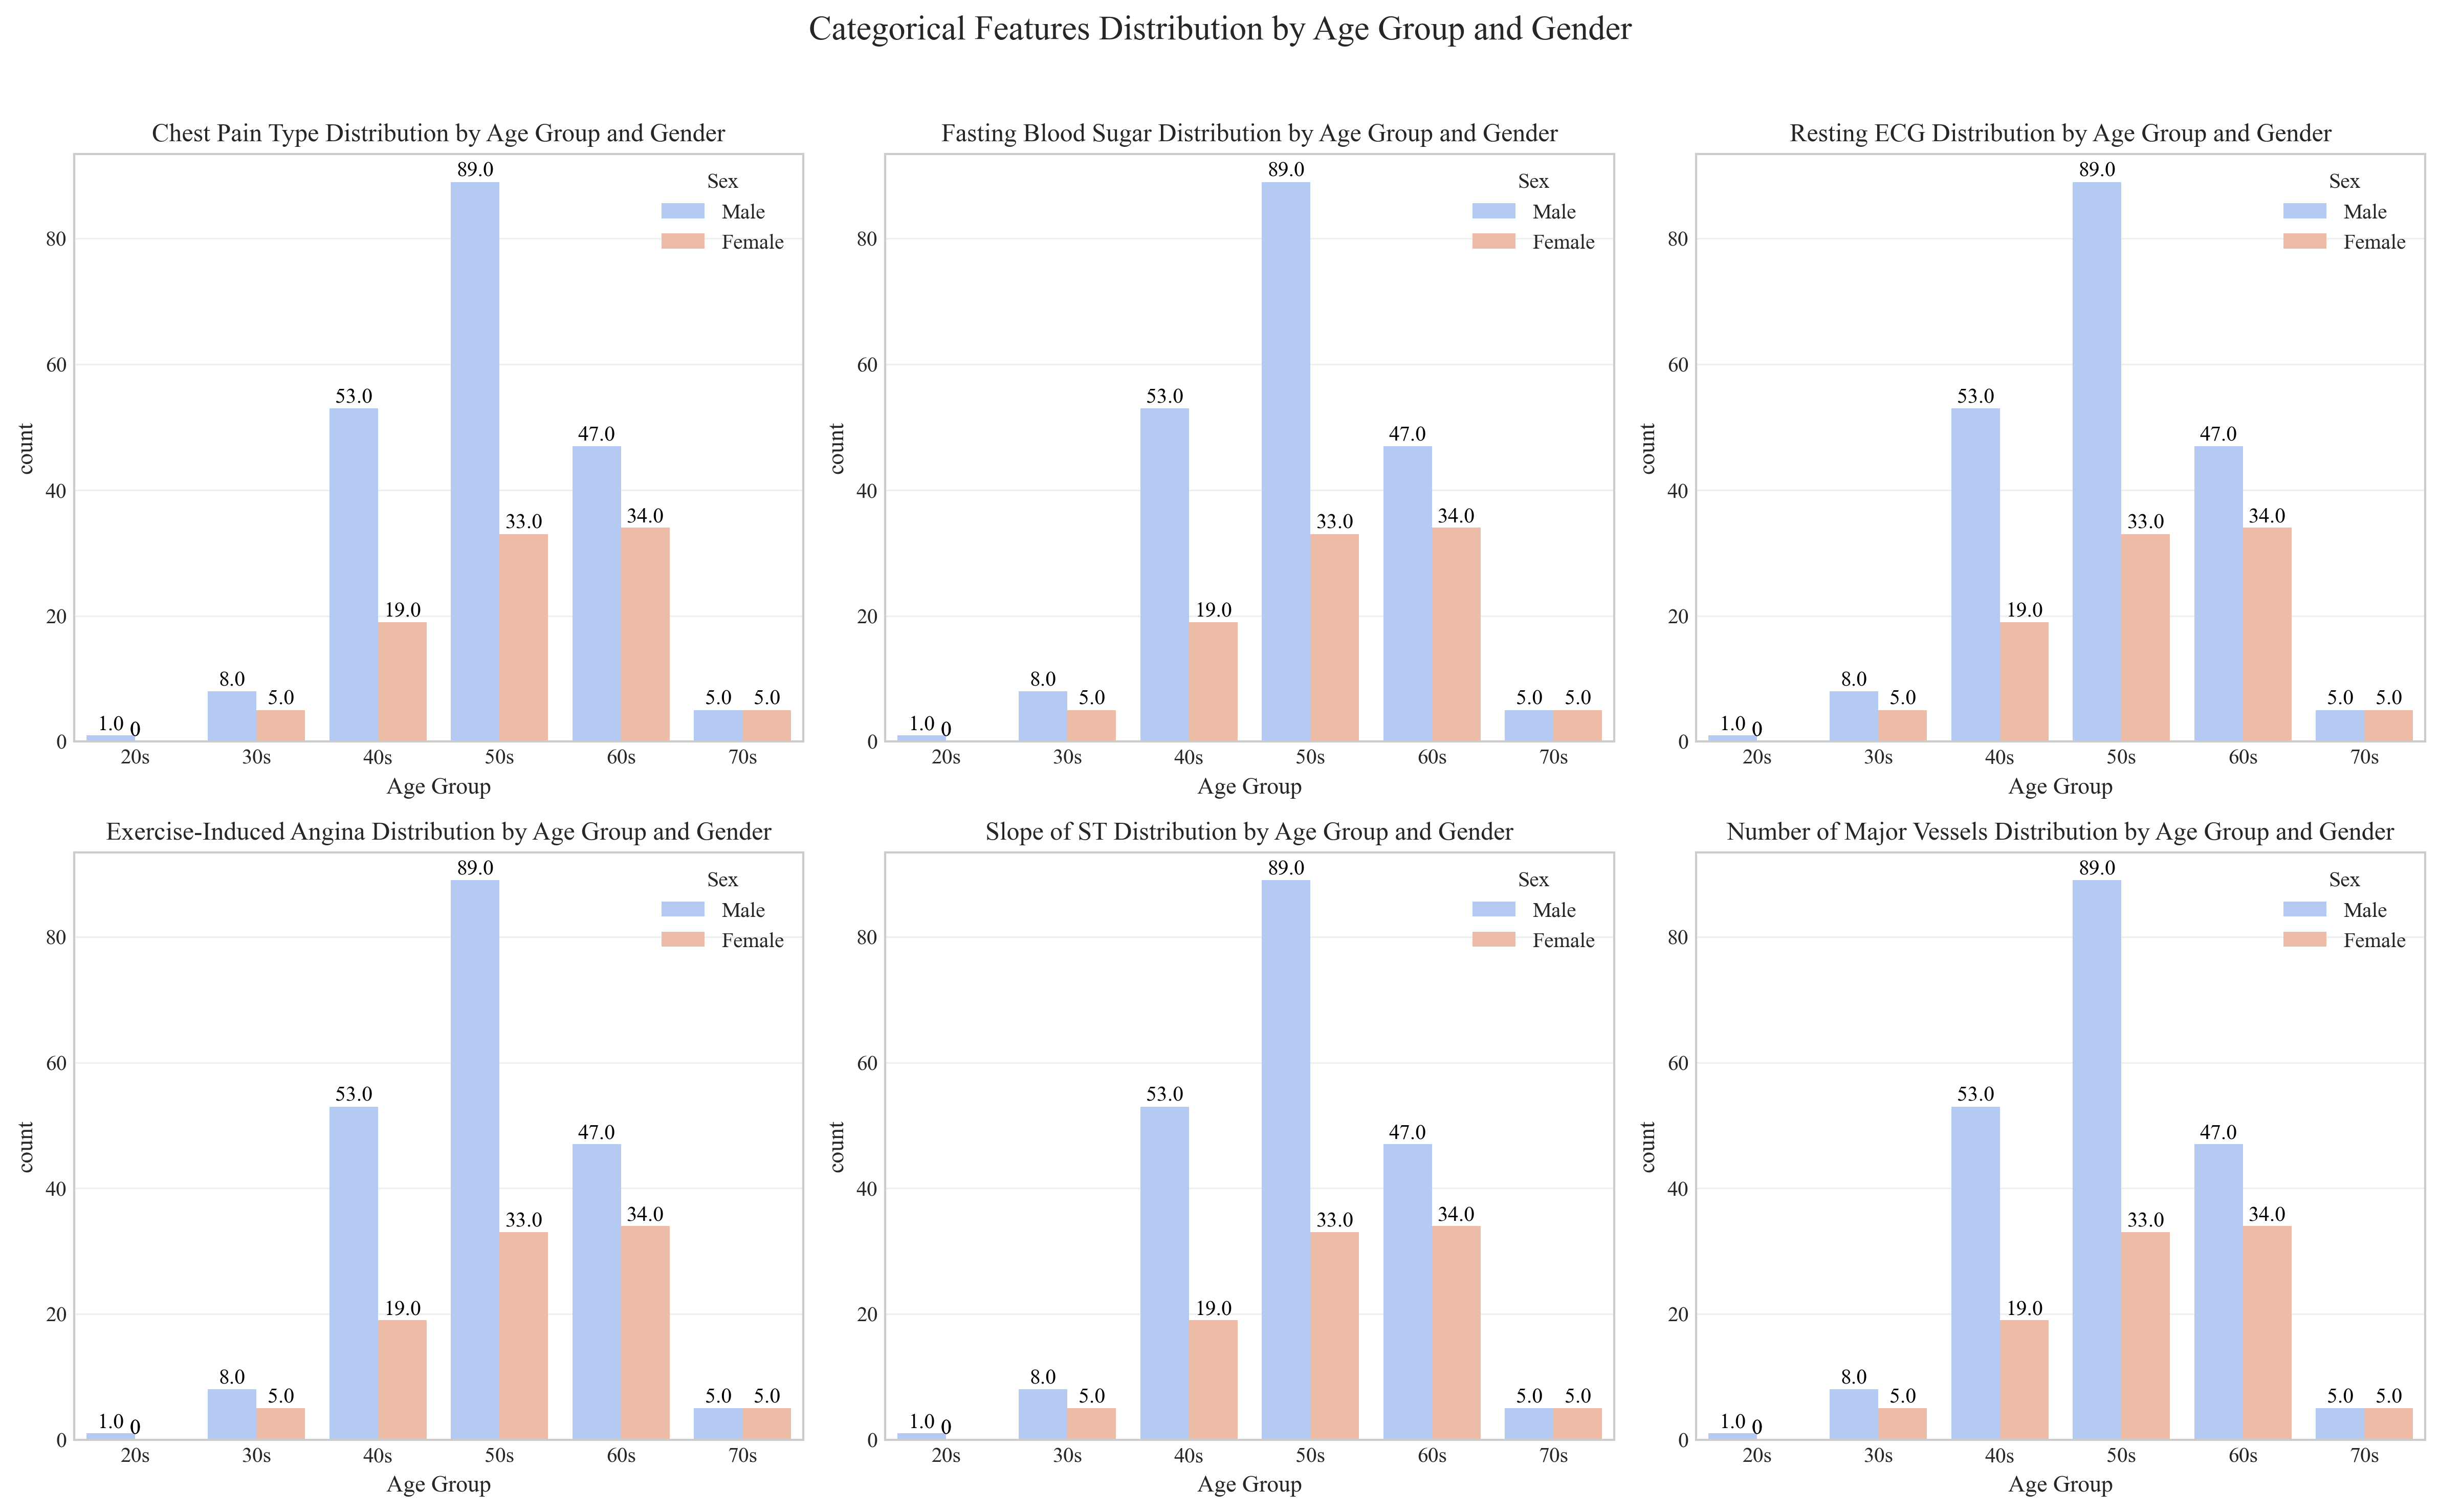

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    if i < len(axes):
        sns.countplot(x='Age Group', hue='Sex', data=df, ax=axes[i], palette='coolwarm', dodge=True)
        
        axes[i].set_title(f'{feature} Distribution by Age Group and Gender', fontsize=12)
        axes[i].grid(axis='y', alpha=0.3)
        
        for p in axes[i].patches:
            axes[i].annotate(f'{p.get_height()}',
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center', fontsize=10,
                             color='black', xytext=(0, 5), textcoords='offset points')

plt.suptitle('Categorical Features Distribution by Age Group and Gender', fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
